This notebooks creates Authors.csv file - eva.ru forum users from downloaded messages.

After the posts were downloaded from the forum, text attributes were precalculated in several separate notebooks: 

- Add Number of Child Messages.ipynb
- Sentiment Analysis - Dostoevsky.ipynb
- Transformers Sentiment Analysis.ipynb
- TextExtendedAttributes_FeatureEngineering.ipynb
- TimeTrends FeatureEngineering.ipynb

The notebook aggregates text attributes per authors in different ways.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import a package to manage the warnings and ignore them
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [ ]:
Data='/content/drive/MyDrive/Colab Notebooks/Projects/eva/Data/'

ta_extension_filename='TextAttributes_ext.csv'
ta_extension_full_filename=os.path.join(Data, ta_extension_filename)

ts_extension_filename='TimeTrends_ext.csv'
ts_extension_full_filename=os.path.join(Data, ts_extension_filename)

sa_extension_filename='SentimentAnalysis_ext.csv'
sa_extension_full_filename=os.path.join(Data, sa_extension_filename)


Authors_filename='Authors.csv'
Authors_full_filename=os.path.join(Data, Authors_filename)

#medium size posts
short_message_limit_words=5
medium_message_limit_words=100

In [ ]:
Authors = pd.read_csv(Authors_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
ta_ext = pd.read_csv(ta_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
ta_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'message_characters', 'message_words', 'emojis', 'images', 'links',
       'original_paragraphs', 'actual_paragraphs', 'avg_paragraph_characters',
       'avg_paragraph_words', 'cnt_childs', 'cnt_immediate_childs',
       'flg_excessive_exclamations', 'flg_excessive_questions',
       'flg_excessive_other', 'num_Adj', 'num_unique_Adj', 'num_Nouns',
       'num_unique_Nouns', 'num_Verb', 'num_unique_Verb', 'num_tokens',
       'num_unique_tokens', 'num_syllables', 'num_long_words',
       'num_unique_long_words', 'num_commas', 'num_exclamations',
       'num_questions', 'num_words', 'ASW', 'PLW', 'TTR', 'TTR_A', 'TTR_N',
       'TTR_V', 'NAV', 'UNAV', 'fraction_of_commas',
       'fraction_of_exclamations', 'fraction_of_questions', 'fraction_of_Adj',
       'fraction_of_Nouns', 'fraction_of_Verbs', 'num_sent', 'avg_sent_len'],
      dtype

In [ ]:
sa_ext = pd.read_csv(sa_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
sa_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'dostoevsky', 'tatyana', 'sentiment', 'inappropriate', 'cnt_childs',
       'cnt_immediate_childs', 'cnt_immediate_childs_tatyana_neg',
       'cnt_immediate_childs_tatyana_pos',
       'cnt_immediate_childs_dostoevsky_neg',
       'cnt_immediate_childs_dostoevsky_pos', 'cnt_immediate_childs_neg',
       'cnt_immediate_childs_pos'],
      dtype='object')

In [ ]:
sa_ext = pd.merge(sa_ext, ta_ext[['Message_Id','message_words']], left_on='Message_Id', right_on='Message_Id', how='inner')

In [ ]:
ts_ext = pd.read_csv(ts_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
ts_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'cnt_childs', 'cnt_immediate_childs', 'Date', 'year', 'month',
       'day_of_week', 'hour', 'day_part', 'is_weekend', 'is_ruNationalHoliday',
       'is_ruObservance', 'is_ruOtherNotWorkingDay', 'HolidayName',
       'HolidayType'],
      dtype='object')

In [ ]:
ts_ext['Timestamp']=pd.to_datetime(ts_ext['Timestamp'], format='%Y-%m-%d %H:%M:%S')

## Author_Id and number of posts

and we do not need Author_Id = 0 (Anonymous)

In [ ]:
Authors = pd.DataFrame({'cnt_messages' : ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['Message_Id'].nunique()}).reset_index()

In [ ]:
Authors.head()

,Author_Id,cnt_messages
0,23,1535
1,27,16
2,32,784
3,35,3415
4,36,4992


## Total Registered Users captured in the dataset from 3 forum chapters

In [ ]:
len(Authors)

20632

### First and Last message Id

In [ ]:
fm_id_df = pd.DataFrame({'First_Message_Id' : ta_ext.groupby(['Author_Id'])['Message_Id'].min()}).reset_index()
lm_id_df = pd.DataFrame({'Last_Message_Id' : ta_ext.groupby(['Author_Id'])['Message_Id'].max()}).reset_index()

In [ ]:
Authors = pd.merge(Authors, fm_id_df, left_on='Author_Id', right_on='Author_Id', how='inner')
Authors = pd.merge(Authors, lm_id_df, left_on='Author_Id', right_on='Author_Id', how='inner')

In [ ]:
Authors.head()

,Author_Id,cnt_messages,First_Message_Id,Last_Message_Id
0,23,1535,67913773,101696362
1,27,16,97031390,102288727
2,32,784,80470511,96142872
3,35,3415,51064403,101933631
4,36,4992,81110399,101760074


## Author name

Names of authors can vary (changed by user before publishing a post), that's why only the latest, by Message_Id and Author_Id is added to Authors dataset

In [ ]:
Authors = pd.merge(Authors, ta_ext[['Message_Id','author']], left_on='Last_Message_Id', right_on='Message_Id', how='inner')

In [ ]:
Authors.head()

,Author_Id,cnt_messages,First_Message_Id,Last_Message_Id,Message_Id,author
0,23,1535,67913773,101696362,101696362,volv ♧ Clair
1,27,16,97031390,102288727,102288727,Oxygen 27 F*
2,32,784,80470511,96142872,96142872,Редакция Евы
3,35,3415,51064403,101933631,101933631,Малефисента ⚜**
4,36,4992,81110399,101760074,101760074,Доктор Филатов SD*


In [ ]:
Authors=Authors[['Author_Id', 'cnt_messages', 'First_Message_Id', 'Last_Message_Id','author']]

## First and Last Message Timestamp

In [ ]:
fm_df = pd.DataFrame({'first_message_ts' : ts_ext.groupby(['Author_Id'])['Timestamp'].min()}).reset_index()
lm_df = pd.DataFrame({'last_message_ts' : ts_ext.groupby(['Author_Id'])['Timestamp'].max()}).reset_index()

In [ ]:
Authors = pd.merge(Authors, fm_df, left_on='Author_Id', right_on='Author_Id', how='inner')
Authors = pd.merge(Authors, lm_df, left_on='Author_Id', right_on='Author_Id', how='inner')

In [ ]:
Authors.head()

,Author_Id,cnt_messages,First_Message_Id,Last_Message_Id,author,first_message_ts,last_message_ts
0,23,1535,67913773,101696362,volv ♧ Clair,2011-07-06 11:00:00,2020-11-09 23:07:00
1,27,16,97031390,102288727,Oxygen 27 F*,2018-05-17 14:17:00,2021-02-19 17:01:00
2,32,784,80470511,96142872,Редакция Евы,2013-04-29 13:46:00,2017-12-11 20:44:00
3,35,3415,51064403,101933631,Малефисента ⚜**,2009-11-02 14:26:00,2020-12-21 17:49:00
4,36,4992,81110399,101760074,Доктор Филатов SD*,2013-06-18 17:11:00,2020-11-20 18:00:00


In [ ]:
Authors=Authors[['Author_Id','author', 'cnt_messages', 'First_Message_Id', 'Last_Message_Id','first_message_ts','last_message_ts']]

In [ ]:
Authors.head()

,Author_Id,author,cnt_messages,First_Message_Id,Last_Message_Id,first_message_ts,last_message_ts
0,23,volv ♧ Clair,1535,67913773,101696362,2011-07-06 11:00:00,2020-11-09 23:07:00
1,27,Oxygen 27 F*,16,97031390,102288727,2018-05-17 14:17:00,2021-02-19 17:01:00
2,32,Редакция Евы,784,80470511,96142872,2013-04-29 13:46:00,2017-12-11 20:44:00
3,35,Малефисента ⚜**,3415,51064403,101933631,2009-11-02 14:26:00,2020-12-21 17:49:00
4,36,Доктор Филатов SD*,4992,81110399,101760074,2013-06-18 17:11:00,2020-11-20 18:00:00


In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

## Publications for the period

In [ ]:
print('from %s to %s '%(Authors['first_message_ts'].min(),Authors['last_message_ts'].max()))

from 2007-04-07 08:03:00 to 2021-10-01 00:27:00 


## Authors productivity analysis. How big is the core user group on eva.ru

In [ ]:
Authors[['author','cnt_messages','first_message_ts','last_message_ts']].sort_values('cnt_messages', ascending=False).head(20)

,author,cnt_messages,first_message_ts,last_message_ts
564,ВесНа 16035 OH*,79541,2009-02-06 15:33:00,2021-09-10 22:52:00
4795,Utra Tumannaja OH*,66213,2009-08-07 09:39:00,2021-07-15 19:10:00
6500,Мизерикордия ♧* Clair,48987,2009-08-10 13:47:00,2021-08-03 11:37:00
10678,Старая Кошелка H*,45868,2009-08-09 19:05:00,2021-08-04 02:16:00
6798,Kobra_I H*,44340,2009-08-11 00:00:00,2018-02-11 20:39:00
2067,Artemis D'Efes SD**,43106,2009-07-17 11:24:00,2021-09-15 01:40:00
4131,"""""""-"""""" H*",40723,2009-08-10 08:28:00,2021-07-03 00:15:00
11894,Inga_groza H*,35660,2010-12-01 15:21:00,2021-08-04 15:36:00
1215,Птичка-невеличкa D,31956,2009-07-23 09:30:00,2017-06-29 20:23:00
312,Ioulia OH*,30794,2009-08-18 16:28:00,2021-09-04 10:38:00


In [ ]:
bins = [0, 100, 1000, 5000, 10000,20000,40000,80000]
Authors['Binned Number of Messages']=pd.cut(Authors['cnt_messages'], bins=bins)

In [ ]:
Authors.groupby('Binned Number of Messages').size().reset_index(name='Count Authors')

,Binned Number of Messages,Count Authors
0,"(0, 100]",17770
1,"(100, 1000]",2162
2,"(1000, 5000]",521
3,"(5000, 10000]",106
4,"(10000, 20000]",48
5,"(20000, 40000]",18
6,"(40000, 80000]",7


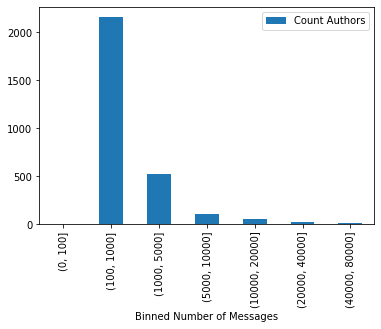

In [ ]:
Authors[Authors['cnt_messages']>100].groupby('Binned Number of Messages').size().reset_index(name='Count Authors').plot.bar(x='Binned Number of Messages', y='Count Authors')

Most of the users (17,770) write as anonymous or do not participate in the forum at all after registration and few posts. 

2,162 publish under real name more often and only 700 prefers to talk openly and do not hide. These 700 users are the real core users of eva.ru forum.

## How many authors were active since Jan 2021

In [ ]:
RecentAuthors = pd.DataFrame({'cnt_2021_messages' : ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['Timestamp']>'2021-01-01'))].groupby(['Author_Id'])['Message_Id'].nunique()}).reset_index()
RecentAuthors = RecentAuthors[RecentAuthors['cnt_2021_messages']>=100]

In [ ]:
Authors = pd.merge(Authors, RecentAuthors, left_on='Author_Id', right_on='Author_Id', how='left')

In [ ]:
Authors['cnt_2021_messages'].fillna(0,inplace=True)

In [ ]:
Authors[Authors['cnt_2021_messages']>0][['author','cnt_messages','cnt_2021_messages','first_message_ts','last_message_ts']].sort_values('cnt_2021_messages', ascending=False).head(20)

,author,cnt_messages,cnt_2021_messages,first_message_ts,last_message_ts
564,ВесНа 16035 OH*,79541,5251.0,2009-02-06 15:33:00,2021-09-10 22:52:00
11894,Inga_groza H*,35660,3690.0,2010-12-01 15:21:00,2021-08-04 15:36:00
17522,mllerelena H*,30214,3477.0,2015-05-11 23:04:00,2021-08-14 23:03:00
20372,PrettyWomen F**,3201,3201.0,2021-02-15 17:17:00,2021-09-18 09:34:00
8553,iWave ♧ Clair,26222,2820.0,2010-04-20 18:17:00,2021-09-27 14:32:00
10365,LaTiana H*,22935,2263.0,2013-09-08 22:30:00,2021-09-15 17:54:00
3133,La_Ri_Sa ♤** Noblesse,15024,2163.0,2009-08-18 11:46:00,2021-08-18 04:31:00
1376,SoBBeR ♤* Clair,17052,2091.0,2009-11-09 20:40:00,2021-09-21 14:47:00
6727,Нигора SD,5656,1896.0,2009-07-24 22:50:00,2021-09-11 19:27:00
1459,Felinka OH*,30269,1854.0,2009-08-11 01:41:00,2021-09-18 01:42:00


In [ ]:
print('There are %s active authors in 2021'%len(Authors[Authors['cnt_2021_messages']>0]))

There are 233 active authors in 2021


## Positive and Negative authors based on posts sentiment analysis of medium size posts

### Negative authors

#### tatyana - based on Tatyana/rubert-base-cased-sentiment-new transformers model https://huggingface.co/Tatyana/rubert-base-cased-sentiment-new

In [ ]:
df=sa_ext[((sa_ext['Author_Id']!=0) & (sa_ext['tatyana']=='NEGATIVE') & (sa_ext['message_words']>short_message_limit_words) & (sa_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id']).size().reset_index(name='num_of_tneg_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
df=sa_ext[((sa_ext['Author_Id']!=0) & (sa_ext['message_words']>short_message_limit_words) & (sa_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id']).size().reset_index(name='num_of_100w_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_tneg_messages']=Authors['num_of_tneg_messages']/Authors['num_of_100w_messages']
Authors['fraction_of_tneg_messages']=Authors['fraction_of_tneg_messages'].fillna(0.0)
Authors['fraction_of_tneg_messages'] = Authors['fraction_of_tneg_messages'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_tneg_messages']].sort_values('fraction_of_tneg_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_tneg_messages
5964,108919,я не V.I.P.,2009-08-25 14:36:00,2012-01-18 15:41:00,7680,0.639344
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,0.638835
2078,48126,Buccaneer H*,2016-03-03 20:30:00,2021-09-25 19:18:00,8827,0.628231
7704,136317,Кутюрье +,2009-08-11 19:41:00,2015-07-19 21:36:00,5916,0.612963
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,0.605948
3035,63200,Оворобьелло ♧ Clair,2009-08-15 18:41:00,2021-08-04 14:05:00,7845,0.605370
4541,86630,mirabrunja H*,2009-08-25 20:18:00,2020-04-29 08:58:00,8215,0.599436
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,0.595638
2723,58662,OllaKo H*,2009-02-06 16:57:00,2021-08-03 19:09:00,14207,0.592298
13,235,Елена H*,2009-09-08 17:51:00,2021-05-31 04:33:00,5364,0.582567


And more recent, this year authors only

In [ ]:
Authors[Authors['cnt_2021_messages']>=0][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_2021_messages','fraction_of_tneg_messages']].sort_values('fraction_of_tneg_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_2021_messages,fraction_of_tneg_messages
14854,304479,dverelom _,2013-02-12 23:53:00,2013-02-12 23:53:00,1,0.0,1.0
14986,310316,...МОТЯ... _,2011-02-20 08:38:00,2011-02-20 08:38:00,1,0.0,1.0
1642,40432,соседка снизу ***,2012-03-22 17:18:00,2012-03-22 17:18:00,1,0.0,1.0
13663,263500,svetusik88@jan _,2010-03-20 00:26:00,2010-03-20 00:26:00,1,0.0,1.0
14995,310694,terranova _,2012-02-06 07:08:00,2012-02-06 07:08:00,1,0.0,1.0
3080,63786,Elena F +,2009-09-04 04:36:00,2009-09-04 04:47:00,2,0.0,1.0
13658,263398,Данара *,2010-10-11 04:29:00,2014-06-16 05:11:00,2,0.0,1.0
14415,283426,MRste *,2012-09-04 13:38:00,2012-09-04 14:59:00,2,0.0,1.0
18539,526509,Swetlichnaya +,2017-07-21 10:57:00,2017-07-21 10:57:00,1,0.0,1.0
9426,167503,aLa-L F,2015-07-30 08:40:00,2015-07-30 08:40:00,1,0.0,1.0


### Positive authors

#### tatyana - based on Tatyana/rubert-base-cased-sentiment-new transformers model https://huggingface.co/Tatyana/rubert-base-cased-sentiment-new

In [ ]:
df=sa_ext[((sa_ext['Author_Id']!=0) & (sa_ext['tatyana']=='POSITIVE') & (sa_ext['message_words']>short_message_limit_words) & (sa_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id']).size().reset_index(name='num_of_tpos_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_tpos_messages']=Authors['num_of_tpos_messages']/Authors['num_of_100w_messages']
Authors['fraction_of_tpos_messages']=Authors['fraction_of_tpos_messages'].fillna(0.0)
Authors['fraction_of_tpos_messages'] = Authors['fraction_of_tpos_messages'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_tpos_messages']].sort_values('fraction_of_tpos_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_tpos_messages
1041,28980,Неllo Kitty H*,2011-11-25 17:32:00,2021-05-23 14:27:00,11778,0.636463
1772,42946,yченый кот из лукоморья SD**,2009-08-17 00:31:00,2021-08-01 14:15:00,5746,0.631858
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,0.576792
1898,44824,Пушистый 44824 H*,2010-09-21 21:49:00,2021-08-08 11:04:00,5712,0.533670
2432,53681,Creambird H*,2009-07-24 21:10:00,2021-09-10 16:19:00,23515,0.496056
2505,55128,Vulpes vulpes/모르겠어요 H*,2009-08-10 13:48:00,2021-04-26 09:10:00,18656,0.486849
16989,428768,~~mous~~ SD**,2014-03-08 23:58:00,2021-06-10 21:50:00,7087,0.483528
8127,143182,дЕвочка H*,2009-07-24 15:31:00,2021-08-06 11:48:00,14955,0.468998
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,0.468851
7916,139847,Ирина (от ника воздержус) F,2009-08-10 14:21:00,2018-08-02 14:21:00,13066,0.460204


And more recent, this year authors only

In [ ]:
Authors[Authors['cnt_2021_messages']>=0][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_tpos_messages']].sort_values('fraction_of_tpos_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_tpos_messages
4301,82782,ribka3 *,2010-02-28 08:16:00,2010-02-28 08:16:00,1,1.0
13811,266965,я_летаю _,2010-06-24 20:17:00,2010-06-24 20:17:00,1,1.0
3200,65402,Audrey **K**,2009-12-18 17:42:00,2010-07-27 06:30:00,2,1.0
7876,139099,Настеньк@ V.I.P.,2014-09-23 16:57:00,2014-09-23 16:57:00,1,1.0
17321,456225,Miluto +,2019-11-22 02:52:00,2019-11-22 02:52:00,1,1.0
12774,242361,solno_solno +,2017-08-31 10:36:00,2017-08-31 11:11:00,2,1.0
1583,39368,Чика **K**,2014-11-03 22:49:00,2014-11-03 22:49:00,1,1.0
16225,374386,Маша Тужикова _,2012-09-25 03:10:00,2012-09-25 03:27:00,2,1.0
3194,65264,Juls_P +,2018-04-05 00:38:00,2018-04-05 00:38:00,1,1.0
7880,139150,ritok ***,2012-04-13 15:32:00,2012-05-31 10:05:00,3,1.0


## Number of Topics created by author

In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['Topic_1st_Message']=='Y'))].groupby(['Author_Id']).size().reset_index(name='cnt_topics_started')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['cnt_topics_started']=Authors['cnt_topics_started'].fillna(0)
Authors['cnt_topics_started'] = Authors['cnt_topics_started'].astype(int)
Authors[['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_topics_started']].sort_values('cnt_topics_started',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_topics_started
10188,181645,♕Пал-на ⚜**,2009-02-06 19:36:00,2020-11-23 18:30:00,1120,797
2,32,Редакция Евы,2013-04-29 13:46:00,2017-12-11 20:44:00,784,758
11557,210557,versus ⚜**,2010-05-23 09:20:00,2019-12-09 22:49:00,784,453
4954,93759,МатильДа♐,2011-01-14 23:05:00,2021-02-17 13:49:00,1590,397
2129,48847,KTM ⚜**,2009-10-22 18:07:00,2017-07-28 21:49:00,423,334
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,283
2474,54697,Отдел рекламы Евы.Ру D*,2009-08-21 11:26:00,2019-05-21 22:38:00,222,221
3978,77587,самка подкустовного выползня H*,2009-08-23 01:01:00,2021-08-20 09:17:00,16373,219
5035,95080,Пани Керша SD*,2012-09-30 21:47:00,2021-08-06 10:08:00,11716,198
12460,234431,ФсекозлихиЯкоролевна H*,2009-09-24 11:26:00,2021-08-06 19:51:00,13945,166


## Number of large topics per author. A topic is considered large if there are more posts then average in subforum.

Posts in each topic (there is a limit 300 posts max per topic set on eva.ru side to download)

In [ ]:
df1=ta_ext[(ta_ext['Author_Id']!=0)].groupby(['Chapter_Id','Chapter','Topic_Id']).size().reset_index(name='cnt_topic_posts')
df1.head()

,Chapter_Id,Chapter,Topic_Id,cnt_topic_posts
0,63,Телефон Доверия,1658991,282
1,63,Телефон Доверия,1872580,52
2,63,Телефон Доверия,1896962,174
3,63,Телефон Доверия,1898126,278
4,63,Телефон Доверия,1899055,167


Average topics length per Chapter

In [ ]:
df3=df1.groupby(['Chapter_Id','Chapter'])['cnt_topic_posts'].mean().reset_index(name='avg_topic_posts')
df3

,Chapter_Id,Chapter,avg_topic_posts
0,63,Телефон Доверия,41.119540
1,77,Все остальное,34.592524
2,137,Детская психология и развитие,23.224257


In [ ]:
Authors.columns

Index(['Author_Id', 'author', 'cnt_messages', 'First_Message_Id',
       'Last_Message_Id', 'first_message_ts', 'last_message_ts',
       'Binned Number of Messages', 'cnt_2021_messages',
       'num_of_tneg_messages', 'num_of_100w_messages',
       'fraction_of_tneg_messages', 'num_of_tpos_messages',
       'fraction_of_tpos_messages', 'cnt_topics_started'],
      dtype='object')

In [ ]:
df2=pd.merge(ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['Topic_1st_Message']=='Y'))][['Author_Id','Topic_Id']], df1, left_on='Topic_Id', right_on='Topic_Id', how='inner')
df4=pd.merge(df2,df3, left_on='Chapter_Id', right_on='Chapter_Id', how='left' )
df5 = df4[(df4['cnt_topic_posts']>df4['avg_topic_posts'])].groupby(['Author_Id']).size().reset_index(name='Num_Large_Topics')
Authors=pd.merge(Authors, df5, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['Num_Large_Topics'] = Authors['Num_Large_Topics'].fillna(0)
Authors['Num_Large_Topics'] = Authors['Num_Large_Topics'].astype(int)
Authors[['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_topics_started', 'Num_Large_Topics']].sort_values('Num_Large_Topics',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_topics_started,Num_Large_Topics
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,283,169
10188,181645,♕Пал-на ⚜**,2009-02-06 19:36:00,2020-11-23 18:30:00,1120,797,168
3978,77587,самка подкустовного выползня H*,2009-08-23 01:01:00,2021-08-20 09:17:00,16373,219,109
5035,95080,Пани Керша SD*,2012-09-30 21:47:00,2021-08-06 10:08:00,11716,198,87
2,32,Редакция Евы,2013-04-29 13:46:00,2017-12-11 20:44:00,784,758,81
11557,210557,versus ⚜**,2010-05-23 09:20:00,2019-12-09 22:49:00,784,453,79
2067,47934,Artemis D'Efes SD**,2009-07-17 11:24:00,2021-09-15 01:40:00,43106,165,76
1646,40522,๖ۣۣۜRомάшkα OH*,2009-08-11 08:22:00,2019-10-12 23:47:00,27370,149,69
383,10884,Вaсилиса OH*,2012-02-06 18:39:00,2021-07-24 10:04:00,4451,91,68
7245,128756,Матра OH*,2009-02-06 18:49:00,2018-12-05 14:14:00,19280,115,64


In [ ]:
Authors['fraction_of_Large_Topics'] = [0.00 if y==0 else x/y for (x,y) in zip(Authors['Num_Large_Topics'],Authors['cnt_topics_started'])]
Authors['fraction_of_Large_Topics'] = Authors['fraction_of_Large_Topics'].fillna(0.0)
Authors['fraction_of_Large_Topics'] = Authors['fraction_of_Large_Topics'].astype(float)
Authors[Authors['cnt_topics_started']>=20][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_topics_started', 'Num_Large_Topics','fraction_of_Large_Topics']].sort_values('fraction_of_Large_Topics',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_topics_started,Num_Large_Topics,fraction_of_Large_Topics
1710,41821,дуратино KF**,2009-10-30 21:30:00,2018-02-13 18:50:00,6038,23,19,0.826087
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,37,30,0.810811
3741,73840,Leti-ka (c) SD*,2009-08-02 21:12:00,2020-06-10 18:05:00,7678,34,27,0.794118
710,19506,ЪсогласнаЯ OH*,2009-08-10 10:49:00,2021-08-04 20:57:00,13983,79,62,0.784810
155,3139,Голубой огонек H*,2010-01-22 00:51:00,2021-09-13 01:24:00,7491,33,25,0.757576
386,11060,Marsha D,2009-07-24 11:56:00,2016-08-23 22:02:00,15934,20,15,0.750000
10159,181164,Земля. F**,2010-11-19 14:50:00,2017-11-23 17:49:00,7906,64,48,0.750000
383,10884,Вaсилиса OH*,2012-02-06 18:39:00,2021-07-24 10:04:00,4451,91,68,0.747253
12182,227042,Йцук - ЛКН C.S.,2009-08-12 22:56:00,2013-08-05 21:23:00,6876,27,20,0.740741
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,27,20,0.740741


In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

## How others react to authors posts (responses to posts) 

The more responses the more interesting author to others

### Immediate responses to authors posts (direct response to the author posts)

In [ ]:
#Total count immediate responses to all authors posts - total_cnt_immediate_childs
df=ts_ext[ts_ext['Author_Id']!=0].groupby(['Author_Id'])['cnt_immediate_childs'].sum().reset_index(name='cnt_immediate_responses')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['cnt_immediate_responses']=Authors['cnt_immediate_responses'].fillna(0)
Authors['cnt_immediate_responses'] = Authors['cnt_immediate_responses'].astype(int)
Authors[['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_immediate_responses']].sort_values('cnt_immediate_responses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_immediate_responses
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,74271
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,53562
6500,116852,Мизерикордия ♧* Clair,2009-08-10 13:47:00,2021-08-03 11:37:00,48987,38475
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,35550
2067,47934,Artemis D'Efes SD**,2009-07-17 11:24:00,2021-09-15 01:40:00,43106,32429
11894,218916,Inga_groza H*,2010-12-01 15:21:00,2021-08-04 15:36:00,35660,32111
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,29593
4131,80099,"""""""-"""""" H*",2009-08-10 08:28:00,2021-07-03 00:15:00,40723,28584
1215,32994,Птичка-невеличкa D,2009-07-23 09:30:00,2017-06-29 20:23:00,31956,24365
1646,40522,๖ۣۣۜRомάшkα OH*,2009-08-11 08:22:00,2019-10-12 23:47:00,27370,23309


In [ ]:
#How many authors posts have immediate responses - fraction_of_messages_with_immediate_responses
df=ts_ext[((ts_ext['Author_Id']!=0) & (ts_ext['cnt_immediate_childs']!=0))].groupby(['Author_Id'])['cnt_immediate_childs'].size().reset_index(name='posts_with_immediate_responses')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_immediate_responses']=Authors['posts_with_immediate_responses']/Authors['cnt_messages']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_immediate_responses']].sort_values('fraction_of_messages_with_immediate_responses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_immediate_responses
2495,54997,Allana H*,2009-08-10 15:03:00,2020-06-17 13:55:00,6195,0.698789
3600,71485,Akva-marin SD**,2009-08-10 12:25:00,2021-08-16 13:13:00,7828,0.698774
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,0.695207
3978,77587,самка подкустовного выползня H*,2009-08-23 01:01:00,2021-08-20 09:17:00,16373,0.690649
12337,231225,teftelka H*,2009-08-10 20:15:00,2021-08-04 22:30:00,25811,0.678083
11894,218916,Inga_groza H*,2010-12-01 15:21:00,2021-08-04 15:36:00,35660,0.675210
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,0.670441
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,0.667915
13281,254205,Вопрос в студию **,2009-11-25 23:43:00,2015-03-30 11:39:00,10966,0.667700
3286,66861,Katarinochka H*,2009-08-23 20:43:00,2021-04-18 17:41:00,7947,0.663269


### It's possible to have more then one immediate response to an author post - avg_immediate_responses

In [ ]:
Authors['avg_immediate_responses']=Authors['cnt_immediate_responses']/Authors['cnt_messages']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_immediate_responses','avg_immediate_responses']].sort_values('avg_immediate_responses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_immediate_responses,avg_immediate_responses
3978,77587,самка подкустовного выползня H*,2009-08-23 01:01:00,2021-08-20 09:17:00,16373,0.690649,1.174861
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,0.670441,1.031151
3600,71485,Akva-marin SD**,2009-08-10 12:25:00,2021-08-16 13:13:00,7828,0.698774,1.014691
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,0.695207,0.981870
2495,54997,Allana H*,2009-08-10 15:03:00,2020-06-17 13:55:00,6195,0.698789,0.942534
5035,95080,Пани Керша SD*,2012-09-30 21:47:00,2021-08-06 10:08:00,11716,0.644418,0.941704
4821,91256,Злюка H*,2009-08-10 13:38:00,2021-04-05 18:23:00,5873,0.597650,0.937511
710,19506,ЪсогласнаЯ OH*,2009-08-10 10:49:00,2021-08-04 20:57:00,13983,0.642637,0.936351
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,0.649816,0.933745
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,0.596725,0.924132


### Discussion, reposnses not direct the authors posts, a topic branch in the discussion. What part of the authors posts create long discussions/branch in a topic?

In [ ]:
df=ts_ext[((ts_ext['Author_Id']!=0) & (ts_ext['cnt_childs']>ts_ext['cnt_immediate_childs']))].groupby(['Author_Id'])['cnt_childs'].size().reset_index(name='cnt_messages_with_discussion')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_discussion']=Authors['cnt_messages_with_discussion']/Authors['cnt_messages']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_immediate_responses','avg_immediate_responses','fraction_of_messages_with_discussion']].sort_values('fraction_of_messages_with_discussion',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_immediate_responses,avg_immediate_responses,fraction_of_messages_with_discussion
11894,218916,Inga_groza H*,2010-12-01 15:21:00,2021-08-04 15:36:00,35660,0.675210,0.900477,0.576192
12337,231225,teftelka H*,2009-08-10 20:15:00,2021-08-04 22:30:00,25811,0.678083,0.834218,0.575646
2495,54997,Allana H*,2009-08-10 15:03:00,2020-06-17 13:55:00,6195,0.698789,0.942534,0.540436
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,0.652244,0.808935,0.538535
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,0.695207,0.981870,0.536169
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,0.667915,0.828267,0.535658
15200,320416,'monkey' D,2011-05-15 12:44:00,2021-02-27 00:28:00,8592,0.617086,0.771997,0.533287
3600,71485,Akva-marin SD**,2009-08-10 12:25:00,2021-08-16 13:13:00,7828,0.698774,1.014691,0.530020
15610,340767,❀Цурбриген❀ OH*,2011-10-28 00:56:00,2021-08-03 02:15:00,13718,0.615979,0.796763,0.527118
9164,162749,Ryja-ya D**,2009-08-09 13:03:00,2016-08-14 14:03:00,8456,0.642739,0.876656,0.518921


### Average number of responses in topic branches created by an author post

In [ ]:
df=ts_ext[((ts_ext['Author_Id']!=0) & (ts_ext['cnt_childs']>ts_ext['cnt_immediate_childs']))].groupby(['Author_Id'])['cnt_childs'].sum().reset_index(name='cnt_responses')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['avg_responses']=Authors['cnt_responses']/Authors['cnt_messages_with_discussion']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_immediate_responses','avg_immediate_responses','fraction_of_messages_with_discussion','avg_responses']].sort_values('avg_responses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_immediate_responses,avg_immediate_responses,fraction_of_messages_with_discussion,avg_responses
3600,71485,Akva-marin SD**,2009-08-10 12:25:00,2021-08-16 13:13:00,7828,0.698774,1.014691,0.530020,12.172813
11894,218916,Inga_groza H*,2010-12-01 15:21:00,2021-08-04 15:36:00,35660,0.675210,0.900477,0.576192,11.824549
12337,231225,teftelka H*,2009-08-10 20:15:00,2021-08-04 22:30:00,25811,0.678083,0.834218,0.575646,11.463723
9164,162749,Ryja-ya D**,2009-08-09 13:03:00,2016-08-14 14:03:00,8456,0.642739,0.876656,0.518921,11.284640
6703,120072,pepe1977 D**,2009-08-12 21:51:00,2019-05-14 09:52:00,7290,0.610700,0.833882,0.468313,10.861746
15610,340767,❀Цурбриген❀ OH*,2011-10-28 00:56:00,2021-08-03 02:15:00,13718,0.615979,0.796763,0.527118,10.612917
8580,151831,мадам Грицацуева SD**,2009-08-19 15:48:00,2019-07-23 15:14:00,9521,0.652347,0.831845,0.497217,10.592733
15821,352442,Золотая Долина H*,2012-01-31 17:51:00,2021-01-03 10:50:00,18757,0.511329,0.622434,0.433118,10.452979
155,3139,Голубой огонек H*,2010-01-22 00:51:00,2021-09-13 01:24:00,7491,0.625684,0.871312,0.466426,10.361191
15200,320416,'monkey' D,2011-05-15 12:44:00,2021-02-27 00:28:00,8592,0.617086,0.771997,0.533287,10.352684


### Sentiment analysis of immediate responses to authors posts
(We can not filter out large posts from the responses easily how it's done in sentiment analysis of authors posts. But from experience it's a rear even when a response is large. It can be tested.)

### Negative responses

In [ ]:

df=sa_ext[sa_ext['Author_Id']!=0].groupby(['Author_Id'])['cnt_immediate_childs_tatyana_neg'].sum().reset_index(name='cnt_of_neg_rersponses')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_neg_rersponses']=Authors['cnt_of_neg_rersponses']/Authors['cnt_immediate_responses']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_immediate_responses','avg_immediate_responses','fraction_of_neg_rersponses']].sort_values('fraction_of_neg_rersponses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_immediate_responses,avg_immediate_responses,fraction_of_neg_rersponses
2723,58662,OllaKo H*,2009-02-06 16:57:00,2021-08-03 19:09:00,14207,10330,0.727106,0.523524
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,9285,0.824015,0.511793
4541,86630,mirabrunja H*,2009-08-25 20:18:00,2020-04-29 08:58:00,8215,6565,0.799148,0.495659
4326,83177,Pink Laguna **K**,2009-10-30 18:01:00,2014-12-06 20:25:00,5090,2470,0.485265,0.492713
6798,121554,Kobra_I H*,2009-08-11 00:00:00,2018-02-11 20:39:00,44340,17018,0.383807,0.491597
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,6602,0.924132,0.488488
2067,47934,Artemis D'Efes SD**,2009-07-17 11:24:00,2021-09-15 01:40:00,43106,32429,0.752308,0.488082
738,20227,Kamelka OH*,2009-11-25 03:39:00,2021-08-08 09:14:00,7033,5252,0.746765,0.486101
637,17882,Большая Медведица ♤ Clair,2009-08-09 23:06:00,2018-12-15 15:02:00,5700,4476,0.785263,0.484808
2495,54997,Allana H*,2009-08-10 15:03:00,2020-06-17 13:55:00,6195,5839,0.942534,0.479363


### Positive responses

In [ ]:

df=sa_ext[sa_ext['Author_Id']!=0].groupby(['Author_Id'])['cnt_immediate_childs_tatyana_pos'].sum().reset_index(name='cnt_of_pos_rersponses')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_pos_rersponses']=Authors['cnt_of_pos_rersponses']/Authors['cnt_immediate_responses']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','cnt_immediate_responses','avg_immediate_responses','fraction_of_neg_rersponses','fraction_of_pos_rersponses']].sort_values('fraction_of_pos_rersponses',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,cnt_immediate_responses,avg_immediate_responses,fraction_of_neg_rersponses,fraction_of_pos_rersponses
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,6670,0.676745,0.316942,0.333133
14762,300103,а ещё в очках! H*,2010-12-15 01:29:00,2021-08-02 23:24:00,8862,5981,0.674904,0.322689,0.324360
5970,109015,Утки D**,2009-08-01 19:42:00,2019-03-20 21:23:00,6177,4035,0.653230,0.382652,0.322181
9791,173346,☼So Velu☼ H*,2009-09-26 17:22:00,2020-02-11 12:44:00,9592,7936,0.827356,0.361895,0.317162
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,5957,0.891233,0.306362,0.310727
1510,38325,Мауси Рекс C.S.,2009-08-20 16:43:00,2013-11-05 11:02:00,6424,5497,0.855697,0.344006,0.302711
153,3128,Купава ♧** Noblesse,2010-03-11 17:43:00,2021-07-30 10:13:00,5291,3961,0.748630,0.329967,0.301944
8127,143182,дЕвочка H*,2009-07-24 15:31:00,2021-08-06 11:48:00,14955,12254,0.819392,0.347723,0.299576
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,7787,0.574093,0.385643,0.299217
386,11060,Marsha D,2009-07-24 11:56:00,2016-08-23 22:02:00,15934,11073,0.694929,0.367199,0.296216


In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

### Correlation between metrics related to the reactions to authors posts

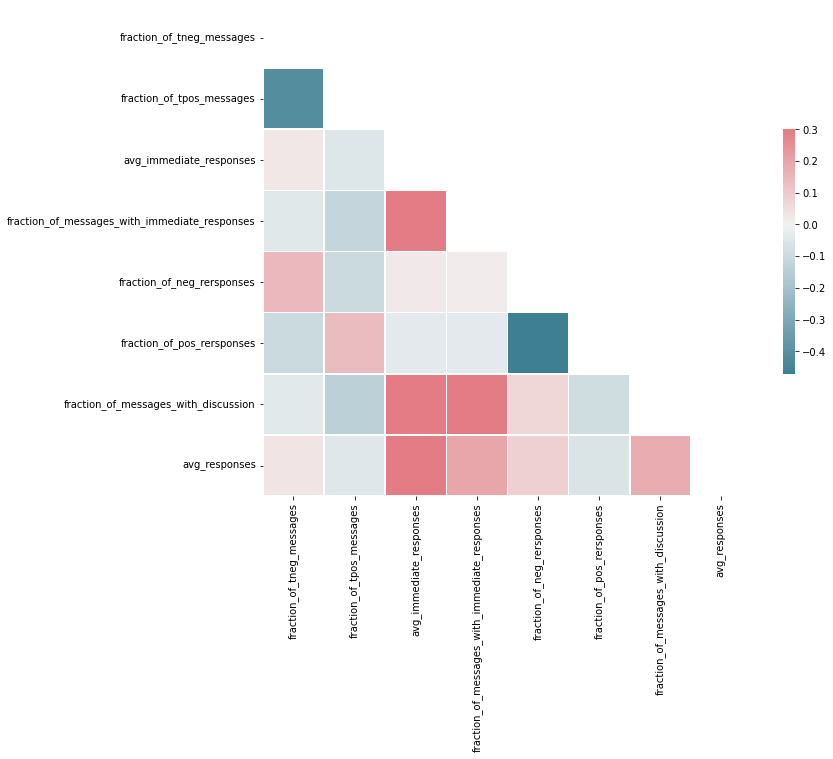

In [ ]:
df=Authors[[           'fraction_of_tneg_messages',
                       'fraction_of_tpos_messages',
                       'avg_immediate_responses',
                       'fraction_of_messages_with_immediate_responses',
                       'fraction_of_neg_rersponses',
                       'fraction_of_pos_rersponses',
                       'fraction_of_messages_with_discussion',
                       'avg_responses']]
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

The level of the correlation is not high but it's clear, that positive messages have less reaction (responses) then negative. There are more positive responses to positive messages and less negative. Negative messages power more discussion, more negative responses and less positive responses.

## Posts Periodicity

In [ ]:
Authors.dtypes

Author_Id                                                 int64
author                                                   object
cnt_messages                                              int64
First_Message_Id                                          int64
Last_Message_Id                                           int64
first_message_ts                                 datetime64[ns]
last_message_ts                                  datetime64[ns]
Binned Number of Messages                              category
cnt_2021_messages                                       float64
num_of_tneg_messages                                    float64
num_of_100w_messages                                    float64
fraction_of_tneg_messages                               float64
num_of_tpos_messages                                    float64
fraction_of_tpos_messages                               float64
cnt_topics_started                                        int64
Num_Large_Topics                        

### Total number of days Author participates in the forum

In [ ]:
Authors['TotalDays']=Authors['last_message_ts'] - Authors['first_message_ts']
Authors['TotalDays']=Authors['TotalDays'].dt.days
Authors['TotalDays']=Authors['TotalDays'].fillna(0)
Authors['TotalDays']=[1 if x==0 else x for x in Authors['TotalDays']]
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','TotalDays']].sort_values('TotalDays', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,TotalDays
959,27475,Boлшeбницa ♧ Clair,2008-12-25 13:56:00,2021-09-15 08:07:00,18091,4646
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,4599
6167,112013,natava C.S. OH*,2009-02-06 15:48:00,2021-09-04 01:37:00,19401,4592
2723,58662,OllaKo H*,2009-02-06 16:57:00,2021-08-03 19:09:00,14207,4561
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,4543


### Number of days with at least 1 non anonymous post

In [ ]:
ts_ext['Date']=ts_ext['Timestamp'].dt.date

In [ ]:
df=pd.DataFrame({'DaysWithMessages' : ts_ext.groupby(['Author_Id'])['Date'].nunique()}).reset_index()
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['DaysWithMessages'] = Authors['DaysWithMessages'].fillna(0)
Authors['DaysWithMessages'] = Authors['DaysWithMessages'].astype(int)
Authors['DaysWithMessages'] = [1 if x==0 else x for x in Authors['DaysWithMessages']]
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','DaysWithMessages']].sort_values('DaysWithMessages', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,DaysWithMessages
1459,37424,Felinka OH*,2009-08-11 01:41:00,2021-09-18 01:42:00,30269,3697
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,3649
838,24215,VooDoo Doll ♤ Clair,2009-08-13 12:45:00,2021-08-05 00:39:00,23153,3517
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,3499
791,21836,Vалькирия OH*,2009-08-11 19:53:00,2021-09-11 09:27:00,22752,3457


### Average days with posts

In [ ]:
Authors['avg_messages_per_day']=Authors['DaysWithMessages']/Authors['TotalDays']
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','avg_messages_per_day']].sort_values('avg_messages_per_day', ascending=False).head().head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_messages_per_day
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,1.000000
15518,336102,Чучуэль C.S.,2011-09-27 23:56:00,2014-05-09 09:51:00,7268,0.882600
17522,470105,mllerelena H*,2015-05-11 23:04:00,2021-08-14 23:03:00,30214,0.854768
1459,37424,Felinka OH*,2009-08-11 01:41:00,2021-09-18 01:42:00,30269,0.836236
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,0.833676


Average posts per day at the first, middle and last part of the author life on the forum: TotalDays is divided to 3 equal parts and calculated number of days with messages in each part (DaysWithMessagesInPeriod). Then average messages per day  is calculated in each period. 3 values is coded: 1 is the lowest and 3 is is the highest. The result is 3 digit value (PeriodDailyPeriodicity) which reflects when the most active and slow period for authors.

In [ ]:
ts_ext=pd.merge(ts_ext, Authors[['Author_Id', 'TotalDays', 'first_message_ts']], left_on='Author_Id', right_on='Author_Id', how='inner')

In [ ]:
ts_ext['DayNum']=ts_ext['Timestamp'] - ts_ext['first_message_ts']
ts_ext['DayNum']=ts_ext['DayNum'].dt.days

In [ ]:
ts_ext['Period'] = [2 if x >= y/3 else 1 for x,y in zip(ts_ext['DayNum'],ts_ext['TotalDays'])]
ts_ext['Period'] = [3 if x >= 2*y/3 else z for x,y,z in zip(ts_ext['DayNum'],ts_ext['TotalDays'],ts_ext['Period'])]

In [ ]:
df = pd.DataFrame({'DaysWithMessagesInPeriod' : ts_ext.groupby(['Author_Id','Period'])['Date'].nunique()}).reset_index()
df=df.pivot_table('DaysWithMessagesInPeriod', 'Author_Id', 'Period').reset_index()
df = df.rename_axis(None, axis=1)  
df.columns=['Author_Id', 'Period1', 'Period2', 'Period3']
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

Authors['Period1'] = Authors['Period1'].fillna(0)
Authors['Period1'] = Authors['Period1'].astype(int)

Authors['Period2'] = Authors['Period2'].fillna(0)
Authors['Period2'] = Authors['Period2'].astype(int)

Authors['Period3'] = Authors['Period3'].fillna(0)
Authors['Period3'] = Authors['Period3'].astype(int)

Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','Period1','Period2','Period3']].sort_values('cnt_messages', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,Period1,Period2,Period3
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,773,1315,1412
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,1151,1301,729
6500,116852,Мизерикордия ♧* Clair,2009-08-10 13:47:00,2021-08-03 11:37:00,48987,1178,1194,1065
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,1251,1239,1159
6798,121554,Kobra_I H*,2009-08-11 00:00:00,2018-02-11 20:39:00,44340,667,864,807


In [ ]:
Authors['avg_messages_per_day_Period1'] = Authors['Period1']/(Authors['DaysWithMessages'])
Authors['avg_messages_per_day_Period2'] = Authors['Period2']/(Authors['DaysWithMessages'])
Authors['avg_messages_per_day_Period3'] = Authors['Period3']/(Authors['DaysWithMessages'])

In [ ]:
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','Period1','avg_messages_per_day_Period1', 'Period2','avg_messages_per_day_Period2', 'Period3','avg_messages_per_day_Period3']].sort_values('cnt_messages', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,Period1,avg_messages_per_day_Period1,Period2,avg_messages_per_day_Period2,Period3,avg_messages_per_day_Period3
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,773,0.220920,1315,0.375822,1412,0.403544
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,1151,0.361950,1301,0.409119,729,0.229245
6500,116852,Мизерикордия ♧* Clair,2009-08-10 13:47:00,2021-08-03 11:37:00,48987,1178,0.342940,1194,0.347598,1065,0.310044
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,1251,0.342834,1239,0.339545,1159,0.317621
6798,121554,Kobra_I H*,2009-08-11 00:00:00,2018-02-11 20:39:00,44340,667,0.285287,864,0.369547,807,0.345167


In [ ]:
def Code_avg_messages_per_day_Period_Detailed(row):
    lst_original=[row['avg_messages_per_day_Period1'],row['avg_messages_per_day_Period2'],row['avg_messages_per_day_Period3']]
    lst=[row['avg_messages_per_day_Period1'],row['avg_messages_per_day_Period2'],row['avg_messages_per_day_Period3']]
    lst.sort()
    lst_sorted_map={k: 0 if k==0 else v+1 for v, k in enumerate(lst)}
    lst_coded=[lst_sorted_map.get(item,item)  for item in lst_original]
    return int(''.join(str(e) for e in lst_coded))

In [ ]:
def CodingPeriod(fraction_messages_in_period):
    if fraction_messages_in_period==0:
        return '0'
    else:
        return '1'
def Code_avg_messages_per_day_Period(row):
    return CodingPeriod(row['avg_messages_per_day_Period1'])+CodingPeriod(row['avg_messages_per_day_Period2'])+CodingPeriod(row['avg_messages_per_day_Period3'])

Authors activity of a forum for 3 periods:
PeriodDailyPeriodicityDetailed
3- maximum
2- moderate
1 - light
0 - no
PeriodDailyPeriodicity:
1 - active
0 - no activity

In [ ]:
Authors['PeriodDailyPeriodicityDetailed'] = Authors.apply(Code_avg_messages_per_day_Period_Detailed, axis=1)

In [ ]:
Authors['PeriodDailyPeriodicity'] = Authors.apply(Code_avg_messages_per_day_Period, axis=1)

In [ ]:
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','PeriodDailyPeriodicityDetailed','PeriodDailyPeriodicity' ]].sort_values('cnt_messages', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,PeriodDailyPeriodicityDetailed,PeriodDailyPeriodicity
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,123,111
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,231,111
6500,116852,Мизерикордия ♧* Clair,2009-08-10 13:47:00,2021-08-03 11:37:00,48987,231,111
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,321,111
6798,121554,Kobra_I H*,2009-08-11 00:00:00,2018-02-11 20:39:00,44340,132,111


Number of authors per activity type

In [ ]:
pd.DataFrame({'cnt_authors' : Authors.groupby(['PeriodDailyPeriodicityDetailed','PeriodDailyPeriodicity']).size()}).reset_index().sort_values('cnt_authors', ascending=False)

,PeriodDailyPeriodicityDetailed,PeriodDailyPeriodicity,cnt_authors
8,300,100,7240
10,303,101,2345
9,302,101,2071
13,321,111,1851
3,203,101,1308
11,312,111,1127
6,231,111,752
14,322,111,686
4,213,111,644
0,123,111,640


In [ ]:
pd.DataFrame({'cnt_authors' : Authors.groupby(['PeriodDailyPeriodicity']).size()}).reset_index().sort_values('cnt_authors', ascending=False)

,PeriodDailyPeriodicity,cnt_authors
2,111,7668
0,100,7240
1,101,5724


How about most active authors?

In [ ]:
pd.DataFrame({'cnt_authors' : Authors[Authors['cnt_messages']>=5000].groupby(['PeriodDailyPeriodicity']).size()}).reset_index().sort_values('cnt_authors', ascending=False)

,PeriodDailyPeriodicity,cnt_authors
1,111,178
0,101,1


As expected, they are active all time

Moderate active authors

In [ ]:
pd.DataFrame({'cnt_authors' : Authors[((Authors['cnt_messages']>=1000) & (Authors['cnt_messages']<5000))].groupby(['PeriodDailyPeriodicity']).size()}).reset_index().sort_values('cnt_authors', ascending=False)

,PeriodDailyPeriodicity,cnt_authors
1,111,510
0,101,11


Even authors with less messages then 5000 are active during all periods

### Day time periodicity

In [ ]:
ts_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'cnt_childs', 'cnt_immediate_childs', 'Date', 'year', 'month',
       'day_of_week', 'hour', 'day_part', 'is_weekend', 'is_ruNationalHoliday',
       'is_ruObservance', 'is_ruOtherNotWorkingDay', 'HolidayName',
       'HolidayType', 'TotalDays', 'first_message_ts', 'DayNum', 'Period'],
      dtype='object')

In [ ]:
df=pd.DataFrame({'cnt_messages' : ts_ext.groupby(['Author_Id','day_part'])['Message_Id'].size()}).reset_index()
df = df.pivot_table('cnt_messages', 'Author_Id', 'day_part').reset_index()
df = df.rename_axis(None, axis=1)  
df=df[['Author_Id', 'dawn', 'early morning', 'late morning', 'noon', 'afternoon', 'evening', 'night', 'midnight' ]]
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

Authors['dawn']=Authors['dawn'].fillna(0)
Authors['dawn'] = Authors['dawn'].astype(float)
Authors['dawn'] = Authors['dawn']/Authors['cnt_messages']

Authors['early morning']=Authors['early morning'].fillna(0)
Authors['early morning'] = Authors['early morning'].astype(float)
Authors['early morning'] = Authors['early morning']/Authors['cnt_messages']

Authors['late morning']=Authors['late morning'].fillna(0)
Authors['late morning'] = Authors['late morning'].astype(float)
Authors['late morning'] = Authors['late morning']/Authors['cnt_messages']

Authors['noon']=Authors['noon'].fillna(0)
Authors['noon'] = Authors['noon'].astype(float)
Authors['noon'] = Authors['noon']/Authors['cnt_messages']

Authors['afternoon']=Authors['afternoon'].fillna(0)
Authors['afternoon'] = Authors['afternoon'].astype(float)
Authors['afternoon'] = Authors['afternoon']/Authors['cnt_messages']

Authors['evening']=Authors['evening'].fillna(0)
Authors['evening'] = Authors['evening'].astype(float)
Authors['evening'] = Authors['evening']/Authors['cnt_messages']

Authors['night']=Authors['night'].fillna(0)
Authors['night'] = Authors['night'].astype(float)
Authors['night'] = Authors['night']/Authors['cnt_messages']

Authors['midnight']=Authors['midnight'].fillna(0)
Authors['midnight'] = Authors['midnight'].astype(float)
Authors['midnight'] = Authors['midnight']/Authors['cnt_messages']

Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts', 'last_message_ts','cnt_messages','dawn','early morning','late morning','noon','afternoon','evening','night','midnight']].sort_values('cnt_messages', ascending=False).head()

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,dawn,early morning,late morning,noon,afternoon,evening,night,midnight
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,0.000453,0.004262,0.156473,0.225582,0.202877,0.153078,0.136056,0.074515
4795,90820,Utra Tumannaja OH*,2009-08-07 09:39:00,2021-07-15 19:10:00,66213,0.004138,0.017081,0.123797,0.235165,0.246372,0.100917,0.094075,0.120112
6500,116852,Мизерикордия ♧* Clair,2009-08-10 13:47:00,2021-08-03 11:37:00,48987,0.000225,0.000102,0.010840,0.093188,0.148958,0.147733,0.274501,0.209913
10678,191294,Старая Кошелка H*,2009-08-09 19:05:00,2021-08-04 02:16:00,45868,0.018466,0.003096,0.000283,0.003815,0.068937,0.297288,0.306401,0.221723
6798,121554,Kobra_I H*,2009-08-11 00:00:00,2018-02-11 20:39:00,44340,0.001872,0.007533,0.070839,0.147091,0.119125,0.165246,0.370095,0.085724


In [ ]:
def Code_messages_per_day_part_Detailed(row):
    lst_original=[row['dawn'],row['early morning'],row['late morning'],row['noon'],row['afternoon'],row['evening'],row['night'],row['midnight']]
    lst=[row['dawn'],row['early morning'],row['late morning'],row['noon'],row['afternoon'],row['evening'],row['night'],row['midnight']]
    lst=list(set(lst))
    lst.sort()
    shift = 0 if 0 in lst else 1
    lst_sorted_map={k:0 if k==0 else v+shift for v, k in enumerate(lst)} 
    lst_coded=[lst_sorted_map.get(item,item)  for item in lst_original]
    return ''.join(str(e) for e in lst_coded)

In [ ]:
def Code_messages_per_day_part(row):
    lst_original=[row['dawn']+row['early morning'],row['late morning']+row['noon'],row['afternoon']+row['evening'],row['night']+row['midnight']]
    lst=[row['dawn']+row['early morning'],row['late morning']+row['noon'],row['afternoon']+row['evening'],row['night']+row['midnight']]
    lst=list(set(lst))
    lst.sort()
    shift = 0 if 0 in lst else 1
    lst_sorted_map={k:0 if k==0 else v+shift for v, k in enumerate(lst)} 
    lst_coded=[lst_sorted_map.get(item,item)  for item in lst_original]
    binary_map={0:0,1:0,2:1,3:1,4:1}
    lst_coded=[binary_map.get(item,item)  for item in lst_coded]
    return ''.join(str(e) for e in lst_coded)

In [ ]:
Authors['DayPartPeriodicityDetailed'] = Authors.apply(Code_messages_per_day_part_Detailed, axis=1)

In [ ]:
Authors['DayPartPeriodicity'] = Authors.apply(Code_messages_per_day_part, axis=1)

In [ ]:
pd.DataFrame({'cnt_authors' : Authors[Authors['cnt_messages']>5000].groupby(['DayPartPeriodicity']).size()}).reset_index().sort_values('cnt_authors', ascending=False)

,DayPartPeriodicity,cnt_authors
2,0111,158
3,1011,9
0,0011,5
1,0110,3
5,1110,3
4,1101,1


Starting from 7 are authors who mostly active night/early morning

In [ ]:
Authors[((Authors['cnt_messages']>5000) & (Authors['DayPartPeriodicityDetailed'].str.startswith('7')))][['Author_Id', 'author', 'cnt_messages', 'dawn', 'early morning', 'late morning', 'noon', 'afternoon', 'evening', 'night', 'midnight','DayPartPeriodicityDetailed','DayPartPeriodicity']]

,Author_Id,author,cnt_messages,dawn,early morning,late morning,noon,afternoon,evening,night,midnight,DayPartPeriodicityDetailed,DayPartPeriodicity
6993,124655,sister999 H*,15548,0.171984,0.083033,0.076987,0.132493,0.165938,0.090172,0.049395,0.203242,73256418,1011


sister999 H* is located in Canada

Authors active noon, afternoon and later

In [ ]:
Authors[((Authors['cnt_messages']>5000) & (Authors['DayPartPeriodicity']=='0111') )][['Author_Id', 'author', 'cnt_messages', 'dawn', 'early morning', 'late morning', 'noon', 'afternoon', 'evening', 'night', 'midnight','DayPartPeriodicityDetailed','DayPartPeriodicity']].sort_values( 'cnt_messages', ascending=False).head()

,Author_Id,author,cnt_messages,dawn,early morning,late morning,noon,afternoon,evening,night,midnight,DayPartPeriodicityDetailed,DayPartPeriodicity
564,16035,ВесНа 16035 OH*,79541,0.000453,0.004262,0.156473,0.225582,0.202877,0.153078,0.136056,0.074515,12687543,0111
4795,90820,Utra Tumannaja OH*,66213,0.004138,0.017081,0.123797,0.235165,0.246372,0.100917,0.094075,0.120112,12678435,0111
6500,116852,Мизерикордия ♧* Clair,48987,0.000225,0.000102,0.010840,0.093188,0.148958,0.147733,0.274501,0.209913,21346587,0111
6798,121554,Kobra_I H*,44340,0.001872,0.007533,0.070839,0.147091,0.119125,0.165246,0.370095,0.085724,12365784,0111
2067,47934,Artemis D'Efes SD**,43106,0.032919,0.019116,0.077808,0.129634,0.161602,0.171971,0.164432,0.186007,21345768,0111


In [ ]:
df = pd.DataFrame({'cnt_messages' : ts_ext.groupby(['Author_Id','Period'])['Message_Id'].size()}).reset_index()
df = df.pivot_table('cnt_messages', 'Author_Id', 'Period').reset_index()
df = df.rename_axis(None, axis=1)
df.columns=['Author_Id','Period1_cnt_messages','Period2_cnt_messages','Period3_cnt_messages']

Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

Authors['Period1_cnt_messages']=Authors['Period1_cnt_messages'].fillna(0)
Authors['Period1_cnt_messages'] = Authors['Period1_cnt_messages'].astype(int)

Authors['Period2_cnt_messages']=Authors['Period2_cnt_messages'].fillna(0)
Authors['Period2_cnt_messages'] = Authors['Period2_cnt_messages'].astype(int)

Authors['Period3_cnt_messages']=Authors['Period3_cnt_messages'].fillna(0)
Authors['Period3_cnt_messages'] = Authors['Period3_cnt_messages'].astype(int)

In [ ]:
df = pd.DataFrame({'cnt_messages' : ts_ext.groupby(['Author_Id','Period','day_part'])['Message_Id'].size()}).reset_index()
df['period_day_part']=df['Period'].astype(str)+' - '+df['day_part']
df=df[['Author_Id','period_day_part','cnt_messages']]
df = df.pivot_table('cnt_messages', 'Author_Id', 'period_day_part').reset_index()
df = df.rename_axis(None, axis=1)  
df=df[['Author_Id', 
       '1 - dawn', '1 - early morning', '1 - late morning', '1 - noon', '1 - afternoon', '1 - evening', '1 - night', '1 - midnight',
       '2 - dawn', '2 - early morning', '2 - late morning', '2 - noon', '2 - afternoon', '2 - evening', '2 - night', '2 - midnight',
       '3 - dawn', '3 - early morning', '3 - late morning', '3 - noon', '3 - afternoon', '3 - evening', '3 - night', '3 - midnight'       
      ]]
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

for i in range(1,4,1):
    for c in ['dawn', 'early morning', 'late morning', 'noon', 'afternoon', 'evening', 'night', 'midnight']:
        column_name=str(i)+' - '+c
        Authors[column_name]=Authors[column_name].fillna(0)
        Authors[column_name] = Authors[column_name].astype(float)
        Authors[column_name] = Authors[column_name]/Authors['Period%s_cnt_messages'%i]

In [ ]:
def Code_messages_period_per_day_part_Detailed(row,period):
    lst_original=[row['%s - dawn'%period],row['%s - early morning'%period],row['%s - late morning'%period],row['%s - noon'%period],row['%s - afternoon'%period],row['%s - evening'%period],row['%s - night'%period],row['%s - midnight'%period]]
    lst=[row['%s - dawn'%period],row['%s - early morning'%period],row['%s - late morning'%period],row['%s - noon'%period],row['%s - afternoon'%period],row['%s - evening'%period],row['%s - night'%period],row['%s - midnight'%period]]
    lst=list(set(lst))
    lst.sort()
    shift = 0 if 0 in lst else 1
    lst_sorted_map={k:0 if k==0 else v+shift for v, k in enumerate(lst)} 
    lst_coded=[lst_sorted_map.get(item,item)  for item in lst_original]
    return ''.join(str(e) for e in lst_coded)

In [ ]:
def Code_messages_period_per_day_part(row,period):
    lst_original=[row['%s - dawn'%period]+row['%s - early morning'%period],row['%s - late morning'%period]+row['%s - noon'%period],row['%s - afternoon'%period]+row['%s - evening'%period],row['%s - night'%period]+row['%s - midnight'%period]]
    lst=[row['%s - dawn'%period]+row['%s - early morning'%period],row['%s - late morning'%period]+row['%s - noon'%period],row['%s - afternoon'%period]+row['%s - evening'%period],row['%s - night'%period]+row['%s - midnight'%period]]
    lst=list(set(lst))
    lst.sort()
    shift = 0 if 0 in lst else 1
    lst_sorted_map={k:0 if k==0 else v+shift for v, k in enumerate(lst)} 
    lst_coded=[lst_sorted_map.get(item,item)  for item in lst_original]
    binary_map={0:0,1:0,2:1,3:1,4:1}
    lst_coded=[binary_map.get(item,item)  for item in lst_coded]
    return ''.join(str(e) for e in lst_coded)

In [ ]:
Authors['Period1 - DayPartPeriodicityDetailed'] = Authors.apply(lambda x: Code_messages_period_per_day_part_Detailed(x, 1), axis=1)
Authors['Period2 - DayPartPeriodicityDetailed'] = Authors.apply(lambda x: Code_messages_period_per_day_part_Detailed(x, 2), axis=1)
Authors['Period3 - DayPartPeriodicityDetailed'] = Authors.apply(lambda x: Code_messages_period_per_day_part_Detailed(x, 3), axis=1)

In [ ]:
Authors['Period1 - DayPartPeriodicity'] = Authors.apply(lambda x: Code_messages_period_per_day_part(x, 1), axis=1)
Authors['Period2 - DayPartPeriodicity'] = Authors.apply(lambda x: Code_messages_period_per_day_part(x, 2), axis=1)
Authors['Period3 - DayPartPeriodicity'] = Authors.apply(lambda x: Code_messages_period_per_day_part(x, 3), axis=1)

In [ ]:
Authors[Authors['cnt_messages']>5000][['Author_Id', 'author', 'cnt_messages', 'Period1 - DayPartPeriodicity', 'Period2 - DayPartPeriodicity', 'Period3 - DayPartPeriodicity']].sort_values('cnt_messages', ascending=False).head(20)

,Author_Id,author,cnt_messages,Period1 - DayPartPeriodicity,Period2 - DayPartPeriodicity,Period3 - DayPartPeriodicity
564,16035,ВесНа 16035 OH*,79541,0111,0111,0111
4795,90820,Utra Tumannaja OH*,66213,0111,0111,0111
6500,116852,Мизерикордия ♧* Clair,48987,0111,0111,0111
10678,191294,Старая Кошелка H*,45868,1011,1011,1011
6798,121554,Kobra_I H*,44340,0111,0111,0111
2067,47934,Artemis D'Efes SD**,43106,0111,0111,0111
4131,80099,"""""""-"""""" H*",40723,0111,0111,0111
11894,218916,Inga_groza H*,35660,0111,0111,0111
1215,32994,Птичка-невеличкa D,31956,0111,0110,0111
312,8938,Ioulia OH*,30794,0111,0111,0111


In [ ]:
Authors[((Authors['cnt_messages']>5000) & ((Authors['Period1 - DayPartPeriodicity'].str.startswith('10')) | (Authors['Period2 - DayPartPeriodicity'].str.startswith('10')) | (Authors['Period3 - DayPartPeriodicity'].str.startswith('10'))))][['Author_Id', 'author', 'cnt_messages', 'Period1 - DayPartPeriodicity', 'Period2 - DayPartPeriodicity', 'Period3 - DayPartPeriodicity']].sort_values('cnt_messages', ascending=False).head(20)

,Author_Id,author,cnt_messages,Period1 - DayPartPeriodicity,Period2 - DayPartPeriodicity,Period3 - DayPartPeriodicity
10678,191294,Старая Кошелка H*,45868,1011,1011,1011
12337,231225,teftelka H*,25811,1011,0111,1011
10365,185361,LaTiana H*,22935,1011,1011,1011
6993,124655,sister999 H*,15548,1110,1011,0111
12460,234431,ФсекозлихиЯкоролевна H*,13945,0111,1011,1011
5476,102033,Sy-Win H*,10681,1011,1011,0111
6079,110502,bonnichka1972 C.B.,9564,1011,0011,0011
2078,48126,Buccaneer H*,8827,1011,1011,1011
1039,28939,Amber SD,7898,1011,0011,1011
6268,113537,Sweet Dream *,6275,0111,1011,0011


Night Birds (US West Coats, Canada) - Старая Кошелка H*, sister999 H*

In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

## Text Attributes

For consistency only medium size posts are included in teh analysis.

 - ASW - average word length in syllables: num_syllables/num_words
 - PLW - percent of long words in a message (based on syllables and long_word_syllabels is >= 3): num_long_words/num_words
 - TTR - type token ratio is a fraction of unique tokens (num_tokens=num_Adj + num_Nouns + num_Verb) in a message  to all recognized adjective, nouns and verbs(num_tokens=num_Adj + num_Nouns + num_Verb): num_unique_tokens/num_tokens
 - TTR_A - fraction of unique recognized adjectives in a message to all recognized adjective: TTR_A = num_unique_Adj/num_Adj
 - TTR_N - fraction of unique recognized nouns in a message to all recognized nouns: num_unique_Nouns/num_Nouns
 - TTR_V -  fraction of unique recognized verbs in a message to all recognized verbs: num_unique_Verb/num_Verb
 - NAV - fraction of recognized adjective and nouns to verbs: NAV = (TTR_A +TTR_N)/TTR_V
 - UNAV - fraction of recognized unique adjective and unique nouns to unique verbs: UNAV = (num_unique_Adj +num_unique_Nouns)/num_unique_Verb 
 - fraction_of_Adj - fraction of adjective to all words in a message: num_Adj/num_words
 - fraction_of_Nouns - fraction of nouns to all words in a message: num_Nouns/num_words
 - fraction_of_Verbs - fraction of verbs to all words in a message: num_Verbs/num_words
 - message_words vs num_words: num_words counts "new line" as a word

In [ ]:
#Authors = pd.read_csv(Authors_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
#ta_ext_df = pd.read_csv(ta_extension_full_filename, error_bad_lines=False, index_col=False) 

In [ ]:
def set_text_type(row):
    if row['message_words'] < short_message_limit_words:
        val = 'Short'
    elif row['message_words'] >=short_message_limit_words and row['message_words']<=medium_message_limit_words:
        val = 'Medium'
    else:
        val = 'Large'
    return val

In [ ]:
ta_ext['text_type']=ta_ext.apply(set_text_type, axis=1)

In [ ]:
len(Authors)

20632

### Who likes to add emojis?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['emojis'].mean().reset_index(name='fraction_of_messages_with_emojis')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_emojis']=Authors['fraction_of_messages_with_emojis'].fillna(0.0)
Authors['fraction_of_messages_with_emojis'] = Authors['fraction_of_messages_with_emojis'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_emojis']].sort_values('fraction_of_messages_with_emojis',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_emojis
6993,124655,sister999 H*,2009-08-22 07:54:00,2021-08-09 04:50:00,15548,2.239838
1510,38325,Мауси Рекс C.S.,2009-08-20 16:43:00,2013-11-05 11:02:00,6424,1.836395
7944,140231,Pechka 140231 H*,2009-08-10 14:48:00,2021-08-03 18:31:00,7130,1.357784
12085,223917,Margulya7 SD,2009-08-11 14:49:00,2015-09-25 19:18:00,10677,1.169711
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,1.022976
5964,108919,я не V.I.P.,2009-08-25 14:36:00,2012-01-18 15:41:00,7680,1.013281
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,0.970142
7916,139847,Ирина (от ника воздержус) F,2009-08-10 14:21:00,2018-08-02 14:21:00,13066,0.969386
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,0.946124
2277,51275,nimbik C.S.,2009-08-17 22:25:00,2015-01-29 10:00:00,5270,0.944213


### Who likes to illustrate posts with images (can be specific emojis in some cases)?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['images'].mean().reset_index(name='fraction_of_messages_with_images')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_images']=Authors['fraction_of_messages_with_images'].fillna(0.0)
Authors['fraction_of_messages_with_images'] = Authors['fraction_of_messages_with_images'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_images']].sort_values('fraction_of_messages_with_images',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_images
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,0.115666
908,26118,наши OH*,2009-08-19 00:51:00,2021-08-03 01:41:00,10421,0.100854
5563,103150,Лелянка٩(͡๏̯͡๏)۶٩(͡๏̯͡๏)۶٩(͡๏̯͡๏)۶ O,2009-09-11 16:41:00,2021-09-27 14:46:00,9467,0.070455
16989,428768,~~mous~~ SD**,2014-03-08 23:58:00,2021-06-10 21:50:00,7087,0.065754
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,0.038848
14087,273989,✿Злюка✿ D,2011-06-21 13:20:00,2018-01-06 19:29:00,14161,0.026552
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,0.026308
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,0.024985
2819,59866,ЭЛЕН 59866 ♤* Clair,2009-09-03 08:18:00,2021-05-26 06:43:00,6446,0.023270
8932,158700,НикОтсутсвует V.I.P.,2011-08-05 00:02:00,2015-03-25 10:31:00,6016,0.019947


Well, images are used less then emojis

### Who likes to add links to something (photos in many cases)?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['links'].mean().reset_index(name='fraction_of_messages_with_links')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_links']=Authors['fraction_of_messages_with_links'].fillna(0.0)
Authors['fraction_of_messages_with_links'] = Authors['fraction_of_messages_with_links'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_links']].sort_values('fraction_of_messages_with_links',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_links
16989,428768,~~mous~~ SD**,2014-03-08 23:58:00,2021-06-10 21:50:00,7087,0.115705
5563,103150,Лелянка٩(͡๏̯͡๏)۶٩(͡๏̯͡๏)۶٩(͡๏̯͡๏)۶ O,2009-09-11 16:41:00,2021-09-27 14:46:00,9467,0.086300
908,26118,наши OH*,2009-08-19 00:51:00,2021-08-03 01:41:00,10421,0.079359
14762,300103,а ещё в очках! H*,2010-12-15 01:29:00,2021-08-02 23:24:00,8862,0.071654
12460,234431,ФсекозлихиЯкоролевна H*,2009-09-24 11:26:00,2021-08-06 19:51:00,13945,0.068340
6529,117237,Karima65 ☆ ♖,2009-09-10 22:57:00,2021-08-04 17:12:00,11975,0.062881
11580,210952,мнение (ака имхо) C.S. KF*,2009-08-25 11:18:00,2017-01-03 00:37:00,6248,0.057458
1232,33343,Kuzminator OH*,2009-07-17 00:36:00,2020-09-25 00:22:00,9266,0.053097
2819,59866,ЭЛЕН 59866 ♤* Clair,2009-09-03 08:18:00,2021-05-26 06:43:00,6446,0.049643
959,27475,Boлшeбницa ♧ Clair,2008-12-25 13:56:00,2021-09-15 08:07:00,18091,0.047372


If lizon had one account, total number of messages was larger then 5000 and she could be included in the list for sure!

In [ ]:
Authors[Authors['cnt_messages']>=100][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','fraction_of_messages_with_links']].sort_values('fraction_of_messages_with_links',ascending=False).head(10)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,fraction_of_messages_with_links
7846,138681,Мягкий и пушистый C.B.,2008-11-16 20:39:00,2012-01-13 18:52:00,134,2.111940
2474,54697,Отдел рекламы Евы.Ру D*,2009-08-21 11:26:00,2019-05-21 22:38:00,222,1.959459
2,32,Редакция Евы,2013-04-29 13:46:00,2017-12-11 20:44:00,784,1.938776
2129,48847,KTM ⚜**,2009-10-22 18:07:00,2017-07-28 21:49:00,423,1.595745
10188,181645,♕Пал-на ⚜**,2009-02-06 19:36:00,2020-11-23 18:30:00,1120,1.461607
11557,210557,versus ⚜**,2010-05-23 09:20:00,2019-12-09 22:49:00,784,1.183673
18700,536035,Редакция Евы.Ру ♤** Noblesse,2017-12-01 18:38:00,2021-08-02 13:59:00,215,1.162791
15811,351893,Главред Всея Евы,2012-02-28 10:38:00,2017-06-27 11:01:00,218,1.155963
7417,130919,CлонёнОК C.B.,2008-09-02 09:26:00,2014-04-04 14:55:00,136,1.132353
19265,712806,Lizonnn F,2019-01-24 00:00:00,2019-02-18 18:08:00,135,0.696296


### Short vs Long messages

#### Average post length in words

In [ ]:
df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['message_words'].mean().reset_index(name='avg_message_words')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words']].sort_values('avg_message_words',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668
13205,252715,Крембрюллова F*,2009-11-28 17:57:00,2016-05-16 13:17:00,6900,60.253623
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,58.921333
8580,151831,мадам Грицацуева SD**,2009-08-19 15:48:00,2019-07-23 15:14:00,9521,56.743514
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,55.731883
5970,109015,Утки D**,2009-08-01 19:42:00,2019-03-20 21:23:00,6177,55.220657
3741,73840,Leti-ka (c) SD*,2009-08-02 21:12:00,2020-06-10 18:05:00,7678,51.066424
1459,37424,Felinka OH*,2009-08-11 01:41:00,2021-09-18 01:42:00,30269,49.171430
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,48.712236


And the shortest messages:

In [ ]:
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words']].sort_values('avg_message_words',ascending=False).tail(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words
126,2276,Nadusha I ♧ Clair,2009-09-23 00:35:00,2021-08-27 02:32:00,12236,16.794704
330,9329,Милли-Ванилли OH*,2009-09-04 13:40:00,2021-09-09 00:11:00,11216,16.511056
1735,42318,MMoon Ƹ̵̡Ӝ̵̨̄Ʒ SD**,2009-08-13 10:59:00,2021-08-03 17:11:00,6698,16.305464
4249,81919,Просто Надька SD**,2009-08-10 20:55:00,2018-02-25 00:06:00,10409,16.211356
7245,128756,Матра OH*,2009-02-06 18:49:00,2018-12-05 14:14:00,19280,15.774689
8641,153007,MaraMara 153007 H*,2011-04-11 17:05:00,2021-08-08 09:55:00,23043,15.758365
1357,35631,ilina H*,2009-08-19 16:08:00,2021-08-16 23:41:00,10213,15.247528
8724,154574,Розария Агро ☭ ♤** Noblesse,2009-10-07 02:42:00,2021-06-12 21:38:00,28699,15.217150
12085,223917,Margulya7 SD,2009-08-11 14:49:00,2015-09-25 19:18:00,10677,15.178140
5133,96727,Семён Васильевич Сокол-Кружкин SD,2009-08-19 22:38:00,2018-03-04 21:32:00,5525,14.961267


#### Fractions of short messages

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']<=short_message_limit_words))].groupby(['Author_Id'])['message_words'].size().reset_index(name='cnt_short_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_short_messages']=Authors['cnt_short_messages']/Authors['cnt_messages']
Authors['fraction_of_short_messages']=Authors['fraction_of_short_messages'].fillna(0.0)
Authors['fraction_of_short_messages'] = Authors['fraction_of_short_messages'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_short_messages']].sort_values('fraction_of_short_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_short_messages
12182,227042,Йцук - ЛКН C.S.,2009-08-12 22:56:00,2013-08-05 21:23:00,6876,10.943426,0.394997
126,2276,Nadusha I ♧ Clair,2009-09-23 00:35:00,2021-08-27 02:32:00,12236,16.794704,0.355018
5147,96852,ZOlya ♧** Noblesse,2009-08-18 23:47:00,2021-08-01 15:39:00,6929,10.167990,0.351855
10159,181164,Земля. F**,2010-11-19 14:50:00,2017-11-23 17:49:00,7906,12.928029,0.333418
5133,96727,Семён Васильевич Сокол-Кружкин SD,2009-08-19 22:38:00,2018-03-04 21:32:00,5525,14.961267,0.311493
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,17.474736,0.311080
2540,55636,Академик Флуда ♤* Clair,2009-08-17 18:14:00,2021-08-26 20:06:00,13753,12.726169,0.307787
8932,158700,НикОтсутсвует V.I.P.,2011-08-05 00:02:00,2015-03-25 10:31:00,6016,13.700465,0.303524
7245,128756,Матра OH*,2009-02-06 18:49:00,2018-12-05 14:14:00,19280,15.774689,0.298807
3621,71865,ясен_пень C.S.,2009-02-06 16:38:00,2012-12-12 17:33:00,5913,14.842550,0.296804


#### Fractions of medium size posts

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['message_words'].size().reset_index(name='cnt_medium_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_medium_messages']=Authors['cnt_medium_messages']/Authors['cnt_messages']
Authors['fraction_of_medium_messages']=Authors['fraction_of_medium_messages'].fillna(0.0)
Authors['fraction_of_medium_messages'] = Authors['fraction_of_medium_messages'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_medium_messages']].sort_values('fraction_of_medium_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_medium_messages
581,16680,Нетка C.B.,2009-08-12 20:54:00,2015-02-15 19:13:00,5311,31.211260,0.939559
2495,54997,Allana H*,2009-08-10 15:03:00,2020-06-17 13:55:00,6195,23.985311,0.929782
6268,113537,Sweet Dream *,2009-08-09 21:07:00,2013-01-08 03:59:00,6275,33.601594,0.926534
4967,93916,Ni/ka OH*,2009-08-22 16:02:00,2021-06-23 18:20:00,5118,29.374170,0.926338
3600,71485,Akva-marin SD**,2009-08-10 12:25:00,2021-08-16 13:13:00,7828,36.578564,0.924119
2400,53282,Боулинг KF,2009-08-12 00:14:00,2016-11-14 20:16:00,6741,27.925975,0.921525
7093,126338,enot41 H*,2009-08-11 19:06:00,2021-08-21 17:07:00,5088,22.208726,0.921187
7819,138192,Ksu1984 D*,2009-08-21 13:57:00,2021-07-28 23:38:00,7207,24.498959,0.914666
1917,45049,Iulianiya(Ulichk@) H*,2009-10-17 18:18:00,2021-07-05 12:26:00,6359,34.107250,0.913666
6443,116004,Марс -- H*,2013-05-02 14:59:00,2021-08-05 00:22:00,6799,34.053096,0.912781


#### Any large size posts (>100 words)?

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0)  & (ta_ext['message_words']>medium_message_limit_words))].groupby(['Author_Id'])['message_words'].size().reset_index(name='cnt_large_messages')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_large_messages']=Authors['cnt_large_messages']/Authors['cnt_messages']
Authors['fraction_of_large_messages']=Authors['fraction_of_large_messages'].fillna(0.0)
Authors['fraction_of_large_messages'] = Authors['fraction_of_large_messages'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_large_messages']].sort_values('fraction_of_large_messages',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_large_messages
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668,0.202698
13205,252715,Крембрюллова F*,2009-11-28 17:57:00,2016-05-16 13:17:00,6900,60.253623,0.199855
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,0.171557
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,58.921333,0.165454
8580,151831,мадам Грицацуева SD**,2009-08-19 15:48:00,2019-07-23 15:14:00,9521,56.743514,0.150614
5970,109015,Утки D**,2009-08-01 19:42:00,2019-03-20 21:23:00,6177,55.220657,0.147483
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,55.731883,0.144360
1459,37424,Felinka OH*,2009-08-11 01:41:00,2021-09-18 01:42:00,30269,49.171430,0.140705
3741,73840,Leti-ka (c) SD*,2009-08-02 21:12:00,2020-06-10 18:05:00,7678,51.066424,0.130372
14762,300103,а ещё в очках! H*,2010-12-15 01:29:00,2021-08-02 23:24:00,8862,47.034981,0.114534


If Filolog had an account she would be a winner! But, in general, the % of large messages is very small

### Paragraphs

In [ ]:
df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['original_paragraphs'].mean().reset_index(name='avg_original_paragraphs')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_original_paragraphs']].sort_values('avg_original_paragraphs',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_original_paragraphs
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,37.234077,4.869938
738,20227,Kamelka OH*,2009-11-25 03:39:00,2021-08-08 09:14:00,7033,40.146879,3.627470
16761,408251,Dezzi 408251 H*,2013-09-16 17:31:00,2021-09-12 08:26:00,11886,40.547114,2.824247
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,24.749161,2.211488
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,1.748157
14762,300103,а ещё в очках! H*,2010-12-15 01:29:00,2021-08-02 23:24:00,8862,47.034981,1.707064
6057,110061,Humpty Dumpty SD,2012-01-12 16:20:00,2019-07-01 00:29:00,28650,30.681815,1.639860
8756,155257,Leran SD**,2009-12-05 00:15:00,2019-10-18 17:09:00,5765,44.604163,1.627754
637,17882,Большая Медведица ♤ Clair,2009-08-09 23:06:00,2018-12-15 15:02:00,5700,34.814211,1.625263
710,19506,ЪсогласнаЯ OH*,2009-08-10 10:49:00,2021-08-04 20:57:00,13983,33.184867,1.608882


#### Who does extra spaces between paragraphs?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['actual_paragraphs'].mean().reset_index(name='avg_actual_paragraphs')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[((Authors['cnt_messages']>=5000) & (Authors['avg_original_paragraphs']-Authors['avg_actual_paragraphs']>1))][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_original_paragraphs','avg_actual_paragraphs']].sort_values('avg_actual_paragraphs',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_original_paragraphs,avg_actual_paragraphs
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,37.234077,4.869938,3.553256
738,20227,Kamelka OH*,2009-11-25 03:39:00,2021-08-08 09:14:00,7033,40.146879,3.627470,2.511873


#### Average Number of words per paragraph

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['avg_paragraph_words'].mean().reset_index(name='avg_paragraph_words')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[((Authors['cnt_messages']>=5000) & (Authors['avg_actual_paragraphs']>1))][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_original_paragraphs','avg_actual_paragraphs','avg_paragraph_words']].sort_values('avg_paragraph_words',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_original_paragraphs,avg_actual_paragraphs,avg_paragraph_words
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,1.748157,1.790622,12.885612
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668,0.912052,1.238552,9.717751
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,48.712236,1.170887,1.356617,9.708407
8756,155257,Leran SD**,2009-12-05 00:15:00,2019-10-18 17:09:00,5765,44.604163,1.627754,1.633304,9.600156
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,37.234077,4.869938,3.553256,9.106494
1459,37424,Felinka OH*,2009-08-11 01:41:00,2021-09-18 01:42:00,30269,49.171430,1.275893,1.191483,8.404220
16761,408251,Dezzi 408251 H*,2013-09-16 17:31:00,2021-09-12 08:26:00,11886,40.547114,2.824247,2.822144,8.355029
14762,300103,а ещё в очках! H*,2010-12-15 01:29:00,2021-08-02 23:24:00,8862,47.034981,1.707064,1.564771,8.301589
7916,139847,Ирина (от ника воздержус) F,2009-08-10 14:21:00,2018-08-02 14:21:00,13066,38.856574,1.408312,2.140977,8.277264
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,55.731883,1.535081,1.188734,8.091683


In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

## Extended Text Attributes

### Excessive exclamations, question marks, commas can be a sign of excited, agitated messages. Repeatedly missing periods is a sign of a style or again, excited, agitated messages.

#### Who likes to add "!!!!"?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['flg_excessive_exclamations'].sum().reset_index(name='num_of_messages_with_excessive_exclamations')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_excessive_exclamations'] = Authors['num_of_messages_with_excessive_exclamations']/Authors['cnt_messages']
Authors['fraction_of_messages_with_excessive_exclamations']=Authors['fraction_of_messages_with_excessive_exclamations'].fillna(0.0)
Authors['fraction_of_messages_with_excessive_exclamations'] = Authors['fraction_of_messages_with_excessive_exclamations'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_messages_with_excessive_exclamations']].sort_values('fraction_of_messages_with_excessive_exclamations',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_messages_with_excessive_exclamations
6993,124655,sister999 H*,2009-08-22 07:54:00,2021-08-09 04:50:00,15548,27.809815,0.251286
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,13.685966,0.200180
12182,227042,Йцук - ЛКН C.S.,2009-08-12 22:56:00,2013-08-05 21:23:00,6876,10.943426,0.178010
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,17.474736,0.141538
8127,143182,дЕвочка H*,2009-07-24 15:31:00,2021-08-06 11:48:00,14955,22.699365,0.115413
11580,210952,мнение (ака имхо) C.S. KF*,2009-08-25 11:18:00,2017-01-03 00:37:00,6248,18.475032,0.086748
3266,66445,Naсh **K**,2009-08-16 14:06:00,2010-12-06 23:47:00,8412,14.324893,0.083096
4326,83177,Pink Laguna **K**,2009-10-30 18:01:00,2014-12-06 20:25:00,5090,27.817878,0.079568
6826,121961,Волкуxа F*,2009-02-06 16:03:00,2017-01-25 23:13:00,5601,21.355472,0.073737
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,23.979357,0.064800


#### Who likes to add "????"?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['flg_excessive_questions'].sum().reset_index(name='num_of_messages_with_excessive_questions')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_excessive_questions'] = Authors['num_of_messages_with_excessive_questions']/Authors['cnt_messages']
Authors['fraction_of_messages_with_excessive_questions']=Authors['fraction_of_messages_with_excessive_questions'].fillna(0.0)
Authors['fraction_of_messages_with_excessive_questions'] = Authors['fraction_of_messages_with_excessive_questions'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_messages_with_excessive_questions']].sort_values('fraction_of_messages_with_excessive_questions',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_messages_with_excessive_questions
6079,110502,bonnichka1972 C.B.,2009-08-10 17:09:00,2014-04-28 17:49:00,9564,17.851317,0.244145
330,9329,Милли-Ванилли OH*,2009-09-04 13:40:00,2021-09-09 00:11:00,11216,16.511056,0.140781
6993,124655,sister999 H*,2009-08-22 07:54:00,2021-08-09 04:50:00,15548,27.809815,0.129020
1357,35631,ilina H*,2009-08-19 16:08:00,2021-08-16 23:41:00,10213,15.247528,0.096348
9791,173346,☼So Velu☼ H*,2009-09-26 17:22:00,2020-02-11 12:44:00,9592,34.065888,0.094871
8127,143182,дЕвочка H*,2009-07-24 15:31:00,2021-08-06 11:48:00,14955,22.699365,0.077365
13120,250487,ФедюлЯ +,2009-11-01 18:41:00,2010-02-22 16:43:00,5571,23.979357,0.060312
12460,234431,ФсекозлихиЯкоролевна H*,2009-09-24 11:26:00,2021-08-06 19:51:00,13945,41.779634,0.053352
3035,63200,Оворобьелло ♧ Clair,2009-08-15 18:41:00,2021-08-04 14:05:00,7845,36.210453,0.049713
12182,227042,Йцук - ЛКН C.S.,2009-08-12 22:56:00,2013-08-05 21:23:00,6876,10.943426,0.049011


#### Who likes to add "!!?" or "??!"?

In [ ]:

df=ta_ext[ta_ext['Author_Id']!=0].groupby(['Author_Id'])['flg_excessive_other'].sum().reset_index(name='num_of_messages_with_excessive_other')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_messages_with_excessive_other'] = Authors['num_of_messages_with_excessive_other']/Authors['cnt_messages']
Authors['fraction_of_messages_with_excessive_other']=Authors['fraction_of_messages_with_excessive_other'].fillna(0.0)
Authors['fraction_of_messages_with_excessive_other'] = Authors['fraction_of_messages_with_excessive_other'].astype(float)
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','fraction_of_messages_with_excessive_other']].sort_values('fraction_of_messages_with_excessive_other',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,fraction_of_messages_with_excessive_other
11059,199529,₪ZаБаVаPu₪ ♧** Noblesse,2009-08-24 21:41:00,2021-08-02 14:06:00,9856,17.474736,0.097910
12113,225358,svetik71 H*,2011-03-31 14:57:00,2020-09-01 18:13:00,6279,23.886128,0.091416
2078,48126,Buccaneer H*,2016-03-03 20:30:00,2021-09-25 19:18:00,8827,17.139572,0.059023
1710,41821,дуратино KF**,2009-10-30 21:30:00,2018-02-13 18:50:00,6038,39.906592,0.048526
6826,121961,Волкуxа F*,2009-02-06 16:03:00,2017-01-25 23:13:00,5601,21.355472,0.044099
1616,39950,Руна 39950 SD**,2009-08-14 13:19:00,2021-08-06 00:37:00,5784,19.043914,0.038209
13764,265951,Ланфрен-Ланфра SD**,2010-04-07 11:53:00,2020-02-06 14:43:00,6684,13.685966,0.037702
2053,47572,КОляка C.B.,2009-08-12 19:08:00,2015-03-26 11:49:00,5709,36.194955,0.035733
7944,140231,Pechka 140231 H*,2009-08-10 14:48:00,2021-08-03 18:31:00,7130,30.264376,0.029453
5167,97140,Тира H*,2009-08-15 00:07:00,2021-08-10 23:53:00,7884,43.404744,0.029046


### The rest of the text attributes makes sense to calculate bath only on medium size (5 - 100 words) posts

#### Average number of commas

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['num_commas'].mean().reset_index(name='avg_num_commas')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_num_commas']].sort_values('avg_num_commas',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_num_commas
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668,5.613498
13205,252715,Крембрюллова F*,2009-11-28 17:57:00,2016-05-16 13:17:00,6900,60.253623,5.165762
8580,151831,мадам Грицацуева SD**,2009-08-19 15:48:00,2019-07-23 15:14:00,9521,56.743514,4.723514
581,16680,Нетка C.B.,2009-08-12 20:54:00,2015-02-15 19:13:00,5311,31.211260,4.469138
5476,102033,Sy-Win H*,2009-08-20 00:34:00,2021-09-18 06:06:00,10681,39.117873,4.374534
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,48.712236,4.210510
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,4.185441
9366,166356,nevera D**,2009-09-14 21:29:00,2019-02-14 15:08:00,5010,47.206587,4.074819
8756,155257,Leran SD**,2009-12-05 00:15:00,2019-10-18 17:09:00,5765,44.604163,4.047862
12460,234431,ФсекозлихиЯкоролевна H*,2009-09-24 11:26:00,2021-08-06 19:51:00,13945,41.779634,4.044870


#### Fraction of medium size posts with commas

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>17) & (ta_ext['message_words']<=100))].groupby(['Author_Id'])['num_commas'].sum().reset_index(name='num_commas')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors['fraction_of_medium_with_commas'] = Authors['num_commas']/Authors['cnt_medium_messages']
Authors['fraction_of_medium_with_commas'] = Authors['fraction_of_medium_with_commas'].fillna(0.0)
Authors['fraction_of_medium_with_commas'] = Authors['fraction_of_medium_with_commas'].astype(float)

Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_num_commas','fraction_of_medium_with_commas']].sort_values('fraction_of_medium_with_commas',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_num_commas,fraction_of_medium_with_commas
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668,5.613498,5.431533
13205,252715,Крембрюллова F*,2009-11-28 17:57:00,2016-05-16 13:17:00,6900,60.253623,5.165762,4.875992
8580,151831,мадам Грицацуева SD**,2009-08-19 15:48:00,2019-07-23 15:14:00,9521,56.743514,4.723514,4.488904
5476,102033,Sy-Win H*,2009-08-20 00:34:00,2021-09-18 06:06:00,10681,39.117873,4.374534,3.997869
581,16680,Нетка C.B.,2009-08-12 20:54:00,2015-02-15 19:13:00,5311,31.211260,4.469138,3.968537
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,48.712236,4.210510,3.963031
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,4.185441,3.953834
9366,166356,nevera D**,2009-09-14 21:29:00,2019-02-14 15:08:00,5010,47.206587,4.074819,3.877250
8756,155257,Leran SD**,2009-12-05 00:15:00,2019-10-18 17:09:00,5765,44.604163,4.047862,3.797556
2544,55666,Ellisiv ♤ Clair,2009-09-21 17:05:00,2021-08-04 19:54:00,8241,40.360272,4.019699,3.734212


#### Average sentence length. Long length maybe an indicator of missed periods

In [ ]:

df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['avg_sent_len'].mean().reset_index(name='avg_sent_len')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_sent_len']].sort_values('avg_sent_len',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_sent_len
581,16680,Нетка C.B.,2009-08-12 20:54:00,2015-02-15 19:13:00,5311,31.211260,15.347036
12337,231225,teftelka H*,2009-08-10 20:15:00,2021-08-04 22:30:00,25811,24.994460,14.693126
14394,282845,я тебе не киска H*,2010-08-29 10:32:00,2021-08-01 17:06:00,11954,39.986783,14.005815
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,48.712236,13.638675
2277,51275,nimbik C.S.,2009-08-17 22:25:00,2015-01-29 10:00:00,5270,29.117837,13.531812
4326,83177,Pink Laguna **K**,2009-10-30 18:01:00,2014-12-06 20:25:00,5090,27.817878,13.242844
12085,223917,Margulya7 SD,2009-08-11 14:49:00,2015-09-25 19:18:00,10677,15.178140,12.845557
3741,73840,Leti-ka (c) SD*,2009-08-02 21:12:00,2020-06-10 18:05:00,7678,51.066424,12.840208
1917,45049,Iulianiya(Ulichk@) H*,2009-10-17 18:18:00,2021-07-05 12:26:00,6359,34.107250,12.832868
838,24215,VooDoo Doll ♤ Clair,2009-08-13 12:45:00,2021-08-05 00:39:00,23153,35.959832,12.453532


#### Average number of sentences

In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['num_sent'].mean().reset_index(name='avg_num_sent')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_message_words','avg_sent_len','avg_num_sent']].sort_values('avg_num_sent',ascending=False).head(20)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_message_words,avg_sent_len,avg_num_sent
6223,112771,R Rina H*,2009-08-17 20:54:00,2021-08-03 15:44:00,11268,66.054668,9.916571,5.129794
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,58.921333,8.702380,4.976810
5970,109015,Утки D**,2009-08-01 19:42:00,2019-03-20 21:23:00,6177,55.220657,9.926608,4.664569
828,24045,Кумпа моя H*,2008-11-09 16:50:00,2021-04-19 11:41:00,13564,60.051091,8.793562,4.572359
5167,97140,Тира H*,2009-08-15 00:07:00,2021-08-10 23:53:00,7884,43.404744,8.932460,4.540652
7366,130311,Не...знакомка SD,2010-01-30 15:24:00,2021-09-16 13:56:00,5912,30.605041,7.188794,4.497614
12460,234431,ФсекозлихиЯкоролевна H*,2009-09-24 11:26:00,2021-08-06 19:51:00,13945,41.779634,8.191983,4.445243
6703,120072,pepe1977 D**,2009-08-12 21:51:00,2019-05-14 09:52:00,7290,24.553635,6.192197,4.231472
6727,120393,Нигора SD,2009-07-24 22:50:00,2021-09-11 19:27:00,5656,31.658593,7.019045,4.224059
5476,102033,Sy-Win H*,2009-08-20 00:34:00,2021-09-18 06:06:00,10681,39.117873,8.425452,4.193287


#### Average length of words and long words

In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])[['ASW', 'PLW']].mean().reset_index()
df.columns=['Author_Id','avg_ASW','avg_PLW']
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

In [ ]:
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_ASW','avg_PLW']].sort_values('avg_ASW',ascending=False)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_ASW,avg_PLW
7366,130311,Не...знакомка SD,2010-01-30 15:24:00,2021-09-16 13:56:00,5912,2.534692,0.197989
10260,183327,Valcure V.I.P.,2009-08-15 17:32:00,2014-07-30 20:17:00,13003,2.386896,0.161523
5964,108919,я не V.I.P.,2009-08-25 14:36:00,2012-01-18 15:41:00,7680,2.201498,0.137839
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,2.095487,0.147422
8641,153007,MaraMara 153007 H*,2011-04-11 17:05:00,2021-08-08 09:55:00,23043,2.081665,0.132542
...,...,...,...,...,...,...,...
3133,64488,La_Ri_Sa ♤** Noblesse,2009-08-18 11:46:00,2021-08-18 04:31:00,15024,1.752051,0.081564
10365,185361,LaTiana H*,2013-09-08 22:30:00,2021-09-15 17:54:00,22935,1.721101,0.079627
908,26118,наши OH*,2009-08-19 00:51:00,2021-08-03 01:41:00,10421,1.706241,0.083278
1465,37514,Север 37514 H*,2010-01-03 19:15:00,2021-07-11 02:31:00,29241,1.701233,0.075939


In [ ]:
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_ASW','avg_PLW']].sort_values('avg_PLW',ascending=False)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_ASW,avg_PLW
7366,130311,Не...знакомка SD,2010-01-30 15:24:00,2021-09-16 13:56:00,5912,2.534692,0.197989
10260,183327,Valcure V.I.P.,2009-08-15 17:32:00,2014-07-30 20:17:00,13003,2.386896,0.161523
5987,109226,Бэн D**,2009-11-28 14:00:00,2021-08-07 17:04:00,5605,2.095487,0.147422
6703,120072,pepe1977 D**,2009-08-12 21:51:00,2019-05-14 09:52:00,7290,2.079719,0.143232
5964,108919,я не V.I.P.,2009-08-25 14:36:00,2012-01-18 15:41:00,7680,2.201498,0.137839
...,...,...,...,...,...,...,...
12113,225358,svetik71 H*,2011-03-31 14:57:00,2020-09-01 18:13:00,6279,1.758389,0.071165
13,235,Елена H*,2009-09-08 17:51:00,2021-05-31 04:33:00,5364,1.786795,0.066726
6993,124655,sister999 H*,2009-08-22 07:54:00,2021-08-09 04:50:00,15548,1.772382,0.064397
4326,83177,Pink Laguna **K**,2009-10-30 18:01:00,2014-12-06 20:25:00,5090,1.757026,0.064257


I did not find a lot of variaty in  NAV, UNAV and TTR attributes between the authors. Let's check just the fraction of adjective

In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['fraction_of_Adj'].mean().reset_index(name='avg_fraction_of_Adj')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_fraction_of_Adj']].sort_values('avg_fraction_of_Adj',ascending=False)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_fraction_of_Adj
10260,183327,Valcure V.I.P.,2009-08-15 17:32:00,2014-07-30 20:17:00,13003,0.118672
12182,227042,Йцук - ЛКН C.S.,2009-08-12 22:56:00,2013-08-05 21:23:00,6876,0.114061
7366,130311,Не...знакомка SD,2010-01-30 15:24:00,2021-09-16 13:56:00,5912,0.112090
3755,74110,*SD H*,2009-08-09 21:42:00,2021-07-23 06:49:00,5794,0.110570
8641,153007,MaraMara 153007 H*,2011-04-11 17:05:00,2021-08-08 09:55:00,23043,0.109742
...,...,...,...,...,...,...
4541,86630,mirabrunja H*,2009-08-25 20:18:00,2020-04-29 08:58:00,8215,0.073511
1917,45049,Iulianiya(Ulichk@) H*,2009-10-17 18:18:00,2021-07-05 12:26:00,6359,0.073184
13,235,Елена H*,2009-09-08 17:51:00,2021-05-31 04:33:00,5364,0.072798
9409,167105,Уши H*,2009-08-11 14:40:00,2021-06-25 19:42:00,7144,0.068626


In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['fraction_of_Nouns'].mean().reset_index(name='avg_fraction_of_Nouns')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_fraction_of_Nouns']].sort_values('avg_fraction_of_Nouns',ascending=False)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_fraction_of_Nouns
10260,183327,Valcure V.I.P.,2009-08-15 17:32:00,2014-07-30 20:17:00,13003,0.297329
10353,185095,Nach. H*,2010-12-07 16:52:00,2017-10-17 22:24:00,10555,0.275420
3266,66445,Naсh **K**,2009-08-16 14:06:00,2010-12-06 23:47:00,8412,0.273230
564,16035,ВесНа 16035 OH*,2009-02-06 15:33:00,2021-09-10 22:52:00,79541,0.268610
8641,153007,MaraMara 153007 H*,2011-04-11 17:05:00,2021-08-08 09:55:00,23043,0.268488
...,...,...,...,...,...,...
15610,340767,❀Цурбриген❀ OH*,2011-10-28 00:56:00,2021-08-03 02:15:00,13718,0.193878
2773,59282,Тиффа OH*,2009-08-18 13:15:00,2021-08-03 08:00:00,9981,0.193679
1012,28446,Lavanda Lvusikus C.S.,2009-07-24 00:06:00,2015-02-22 02:42:00,15556,0.193520
445,12518,Рrincess ♤* Clair,2009-08-23 21:52:00,2021-09-23 12:08:00,13071,0.188482


In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])['fraction_of_Verbs'].mean().reset_index(name='avg_fraction_of_Verbs')
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')
Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_fraction_of_Verbs']].sort_values('avg_fraction_of_Verbs',ascending=False)

,Author_Id,author,first_message_ts,last_message_ts,cnt_messages,avg_fraction_of_Verbs
6079,110502,bonnichka1972 C.B.,2009-08-10 17:09:00,2014-04-28 17:49:00,9564,0.191665
5970,109015,Утки D**,2009-08-01 19:42:00,2019-03-20 21:23:00,6177,0.190834
4249,81919,Просто Надька SD**,2009-08-10 20:55:00,2018-02-25 00:06:00,10409,0.189813
10431,186416,Diana~ H*,2009-12-04 11:00:00,2021-06-18 22:05:00,5162,0.188763
5964,108919,я не V.I.P.,2009-08-25 14:36:00,2012-01-18 15:41:00,7680,0.188266
...,...,...,...,...,...,...
4498,85770,.秋. OH*,2009-08-18 15:23:00,2021-08-16 16:21:00,15288,0.146167
4844,91752,Yagaya Baba C.B.,2009-09-12 19:36:00,2013-11-13 09:05:00,6941,0.145879
838,24215,VooDoo Doll ♤ Clair,2009-08-13 12:45:00,2021-08-05 00:39:00,23153,0.145618
599,16999,Crazy Horse SD**,2010-02-19 00:15:00,2021-01-14 15:25:00,8017,0.137238


In [ ]:
df=ta_ext[((ta_ext['Author_Id']!=0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))].groupby(['Author_Id'])[['ASW', 'PLW', 'TTR', 'TTR_A', 'TTR_N','TTR_V', 'NAV', 'UNAV']].mean().reset_index()
df.columns=['Author_Id','avg_ASW','avg_PLW','avg_TTR','avg_TTR_A','avg_TTR_N','avg_TTR_V','avg_NAV','avg_UNAV']
Authors=pd.merge(Authors, df, left_on='Author_Id', right_on='Author_Id', how='left')

In [ ]:
#Authors[Authors['cnt_messages']>=5000][['Author_Id','author','first_message_ts','last_message_ts','cnt_messages','avg_ASW','avg_PLW','avg_TTR','avg_TTR_A','avg_TTR_N','avg_TTR_V','avg_NAV','avg_UNAV']].sort_values('avg_NAV',ascending=False)

In [ ]:
Authors.drop('avg_PLW_y', axis=1, inplace=True)

In [ ]:
Authors.to_csv(Authors_full_filename, header=True, index=False)

In [ ]:
Authors.columns.tolist()

['Author_Id',
 'author',
 'cnt_messages',
 'First_Message_Id',
 'Last_Message_Id',
 'first_message_ts',
 'last_message_ts',
 'Binned Number of Messages',
 'cnt_2021_messages',
 'num_of_tneg_messages',
 'num_of_100w_messages',
 'fraction_of_tneg_messages',
 'num_of_tpos_messages',
 'fraction_of_tpos_messages',
 'cnt_topics_started',
 'Num_Large_Topics',
 'fraction_of_Large_Topics',
 'cnt_immediate_responses',
 'posts_with_immediate_responses',
 'fraction_of_messages_with_immediate_responses',
 'avg_immediate_responses',
 'cnt_messages_with_discussion',
 'fraction_of_messages_with_discussion',
 'cnt_responses',
 'avg_responses',
 'cnt_of_neg_rersponses',
 'fraction_of_neg_rersponses',
 'cnt_of_pos_rersponses',
 'fraction_of_pos_rersponses',
 'TotalDays',
 'DaysWithMessages',
 'avg_messages_per_day',
 'Period1',
 'Period2',
 'Period3',
 'avg_messages_per_day_Period1',
 'avg_messages_per_day_Period2',
 'avg_messages_per_day_Period3',
 'PeriodDailyPeriodicityDetailed',
 'PeriodDailyPeriodic